<table align="left" width=100%>
    <tr>
        <td style="text-align: right" rowspan="7" width=120>
            <img src="https://drive.google.com/uc?export=view&id=1FwTwBVkCo4xtihoHAnUVla7zQqe-lOaw" width=120 align="left" >
        </td>            
        <td style="text-align: right" width=140>
            <b>Case</b>
        </td>
        <td style="text-align: left">
            Incognia: Digital Bank Mobile App Transaction Events
        </td>
    </tr>
    <tr>
        <td style="text-align: right" >
            <b>Candidate Name</b>
        </td>
        <td style="text-align: left">             
             Hugo Roberto de Melo Daher
            <a href="https://www.linkedin.com/in/hugodaher/" target="blank">
               <img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" width=16 align="right">
            </a>
            <a href="mailto:hugodaher@hotmail.com"
               ><img src="https://i0.wp.com/abcdados.com.br/wp-content/uploads/2019/01/icone-email.png?fit=300%2C300" width=16 align="right">
            </a>
        </td>
    </tr>
    <tr>
        <td style="text-align: right" >
            <b>Objective</b>
        </td>
        <td style="text-align: left">
            Conduct an in-depth descriptive analysis of the Transaction Events  dataset and, based on the findings from this analysis, <br>develop a set of rules to classify transactions into high, medium, and low risk of fraud.
        </td>
    </tr>
    <tr>
        <td style="text-align: right" >
            <b>Method</b>
        </td>
        <td style="text-align: left">
            Exploratory Data Analysis
        </td>
    </tr>
    <tr>
        <td style="text-align: right" >
            <b>Language</b>
        </td>
        <td style="text-align: left">
            Python
        </td>
    </tr>
    <tr>
        <td style="text-align: right" >
            <b>Framework</b>
        </td>
        <td style="text-align: left">
            Google Colab
        </td>
    </tr>
    <tr>
        <td style="text-align: right" >
            <b>Date</b>
        </td>
        <td style="text-align: left">
            24-oct-2023
        </td>
    </tr>
</table>



# 1 - Descriptive Analysis of Transaction Events

## Loading libraries

In [1]:
# Checking Python version
!python --version

Python 3.10.12


In [ ]:
# Installing pandas-profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [3]:
# Libraries
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
sns.set(style="whitegrid")
from ydata_profiling import ProfileReport

import matplotlib.pyplot as plt
%matplotlib inline

# Supress warning messages
import warnings
warnings.filterwarnings("ignore")

## Data Collection

In [4]:
# Connect with Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [5]:
# List files in the current directory
%cd /content/gdrive/MyDrive/Incognia/datasets

!ls

/content/gdrive/MyDrive/Incognia/datasets
'Hugo _ BASE 1 incognia-digital-banking-transactions.csv'
'Hugo _ BASE 2 - incognia-digital-banking-transactions-fraud-feedback.csv'


In [6]:
# Importing dataset 1: Transactions dataset containing transaction events from a Digital Bank Mobile App
df = pd.read_csv('Hugo _ BASE 1 incognia-digital-banking-transactions.csv')

In [7]:
# Importing dataset 2: Fraud dataset containing the list of transactions that resulted in fraud.
df_fraud = pd.read_csv('Hugo _ BASE 2 - incognia-digital-banking-transactions-fraud-feedback.csv')

In [8]:
# Creating a backup
df_bkp = df.copy()
df_fraud_bkp = df_fraud.copy()

## Data Inspection

Each event in dataset 1 is represented by the following variables:
- **transaction_id**: Unique event identifier
- **transaction_timestamp**: Timestamp of the event in milliseconds
- **transaction_value**: Monetary value of the transaction in reais (R$)
- **account_id**: Identifier of the associated account
- **device_id**: Identifier of the device used for the event
- **distance_to_frequent_location**: Distance in meters from a trusted location associated with the account at the time of the event
- **device_age_days**: Number of days since the device was first associated with the account
- **is_emulator**: Indicates if the device was identified as an emulator
- **has_fake_location**: Indicates if the device was generating false location information
- **has_root_permissions**: Indicates if the device had root privileges
- **app_is_tampered**: Indicates if the app used was tampered in any way
- **client_decision**: Apps’ final evaluation of the transaction (approved or denied) after the two-factor authentication (2FA) process


In [9]:
# First 5 rows of the dataset 1
df.head()

transaction_id  transaction_timestamp  account_id   device_id  \
0  691e8232-68b7          1693011151145  1877895943  1000002513   
1  64b4e6b8-dd66          1692027970161   616054714  1000006901   
2  9df0ac4c-2942          1692005618374   248051189  1000009259   
3  6847e894-2421          1690895607459   495694495  1000011126   
4  a4a93162-a40f          1693091270966  1619461409  1000017604   

   distance_to_frequent_location  device_age_days is_emulator  \
0                       6.053306               66       False   
1                       2.892866              341       False   
2                       6.321539              157       False   
3                       0.424901               22       False   
4                      10.508660                0       False   

   has_fake_location has_root_permissions app_is_tampered  transaction_value  \
0              False                False           False          32.920991   
1              False                False           False         234.838637   
2              False                False           False          84.472971   
3              False                False           False         281.682158   
4              False                False           False          65.961074   

  client_decision  
0        approved  
1        approved  
2          denied  
3        approved  
4        approved

Each event in dataset 2 is represented by one single variable:
- **transaction_id**: Unique event identifier

In [10]:
# First 5 rows of the dataset 2
df_fraud.head()

transaction_id
0  d1f454ed-d7a3
1  b0bb356c-e86f
2  2c799002-4fed
3  297ca20d-f1b6
4  76f4c2f5-65bf

In [11]:
# Dataset 1 description
df.describe()

transaction_timestamp    account_id     device_id  \
count           4.094280e+05  4.094280e+05  4.094280e+05   
mean            1.692176e+12  1.072168e+09  1.068867e+09   
std             7.803048e+08  6.203599e+08  6.201939e+08   
min             1.690848e+12  6.096000e+03  1.255200e+04   
25%             1.691508e+12  5.357723e+08  5.303959e+08   
50%             1.692169e+12  1.070308e+09  1.069579e+09   
75%             1.692839e+12  1.609992e+09  1.603215e+09   
max             1.693526e+12  2.147481e+09  2.147472e+09   

       distance_to_frequent_location  device_age_days  transaction_value  
count                   4.082410e+05    409428.000000      409428.000000  
mean                    1.446836e+04       125.136556         217.828410  
std                     2.304911e+05       119.678344         392.318232  
min                     0.000000e+00         0.000000           1.751894  
25%                     1.883862e+00        20.000000          57.450819  
50%                     5.852783e+00        93.000000         109.208173  
75%                     4.046409e+01       215.000000         218.112930  
max                     1.650000e+07       366.000000       27230.352490

In [12]:
# Dataset 2 description
df_fraud.describe()

transaction_id
count           42590
unique          42402
top          0.00E+00
freq               13

In [13]:
# Information about the dataset 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409428 entries, 0 to 409427
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   transaction_id                 409428 non-null  object 
 1   transaction_timestamp          409428 non-null  int64  
 2   account_id                     409428 non-null  int64  
 3   device_id                      409428 non-null  int64  
 4   distance_to_frequent_location  408241 non-null  float64
 5   device_age_days                409428 non-null  int64  
 6   is_emulator                    409360 non-null  object 
 7   has_fake_location              409428 non-null  bool   
 8   has_root_permissions           409360 non-null  object 
 9   app_is_tampered                409360 non-null  object 
 10  transaction_value              409428 non-null  float64
 11  client_decision                409428 non-null  object 
dtypes: bool(1), float64(2), int64(

In [14]:
# Information about the dataset 2
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42590 entries, 0 to 42589
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  42590 non-null  object
dtypes: object(1)
memory usage: 332.9+ KB


## Summary Statistics

In [15]:
# Summarizing dataset 1 and generating an overview, variables detailed, interactions and correlations
profile = ProfileReport(df, title="Transactions Dataset EDA", explorative=True, progress_bar=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Important considerations about dataset 1

In addition to the report above, there are some important considerations:

- device_id: 78.5% is distinct, however, account_id is not, and this means that there are devices with multiples accounts.
- transaction_id, transaction_timestamp: duplicates values is a red flag.
- is_emulator,has_root_permitions,app_is_tampered: all of them with 68 missing values and strong correlations between them.
- transaction_value: too many decimal numbers for a BRD currency, probably was converted from another currency.




In [16]:
# Summarizing dataset 2
profile = ProfileReport(df_fraud, title="Fraud dataset EDA", explorative=True, progress_bar=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Important considerations about dataset 2

There are __177 duplicate transaction_id__, and one of them is __"0.00E+00"__ with 13 duplicates.

In [17]:
# Number of "0.00E+00" values in dataset 1 that had the transaction approved by the customer.
df[(df['transaction_id']=='0.00E+00') & (df['client_decision']=='approved')].value_counts().count()

89

As the fraud dataset only has the transaction_id, it is not possible to determine which of the __89 transactions approved by the client__ were considered fraud, as they all use the same transaction id __"0.00E+00"__, we can only infer that __13 of these transactions resulted in fraud__.

## Data preprocessing

### Converting "transaction_timestamp" from milliseconds to datetime.

Converting a large number of milliseconds to a datetime format is important because we will work with timestamps and dates. This will improve human readability and data presentation.

In [18]:
# Converting "transaction_timestamp" from milliseconds to datetime format
df['transaction_timestamp'] = pd.to_datetime(df['transaction_timestamp'], unit='ms')
df['transaction_timestamp']

0        2023-08-26 00:52:31.145
1        2023-08-14 15:46:10.161
2        2023-08-14 09:33:38.374
3        2023-08-01 13:13:27.459
4        2023-08-26 23:07:50.966
                   ...          
409423   2023-08-18 01:13:59.665
409424   2023-08-18 17:09:25.821
409425   2023-08-29 21:35:18.703
409426   2023-08-27 21:05:53.868
409427   2023-08-29 20:04:04.503
Name: transaction_timestamp, Length: 409428, dtype: datetime64[ns]

### Date range

In [19]:
# Checking the minimum and maximum dates to determine date range of this dataset.
print("The minimum date is:",df['transaction_timestamp'].min())
print("The maximum date is:",df['transaction_timestamp'].max())

The minimum date is: 2023-08-01 00:01:11.811000
The maximum date is: 2023-08-31 23:59:54.872000


### Creating numeric feature from categorical feature

In [20]:
# Creating a boolean variable based on client_decision variable: Approved/Denied to True/False
df['client_decision_bol'] = df['client_decision'].replace(["denied", "approved"],[False,True])

## Data Cleaning

### Duplicated rows

In [21]:
# Number of duplicated rows in dataset 1
df.duplicated().sum()

0

In [22]:
# Number of duplicated rows in dataset 2
df_fraud.duplicated().sum()

188

As the objective of dataset 2 is to inform which transaction is fraud, __duplicated rows will be eliminated__ to facilitate data crossing between the datasets.

In [23]:
# Dropping duplicate rows in dataset 2
df_fraud = df_fraud.drop_duplicates()
df_fraud.duplicated().sum()

0

### Merging Data

By merging the datasets, we will be able to create the target variable __"fraud"__ which will be filled with 0/1 as a result of the merge meaning whether the transaction resulted in fraud or not.

In [24]:
# Adding a column to positively flag (1) all transactions_id
df_fraud['fraud'] = 1

# Merging Transactions dataset with Fraud dataset (equivalent to a "LEFT JOIN" in SQL)
df_merged = pd.merge(df, df_fraud, how='left', on='transaction_id')

# Filling null data with negative response for fraud (0)
df_merged['fraud'].fillna(0, inplace=True)
df = df_merged
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409428 entries, 0 to 409427
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   transaction_id                 409428 non-null  object        
 1   transaction_timestamp          409428 non-null  datetime64[ns]
 2   account_id                     409428 non-null  int64         
 3   device_id                      409428 non-null  int64         
 4   distance_to_frequent_location  408241 non-null  float64       
 5   device_age_days                409428 non-null  int64         
 6   is_emulator                    409360 non-null  object        
 7   has_fake_location              409428 non-null  bool          
 8   has_root_permissions           409360 non-null  object        
 9   app_is_tampered                409360 non-null  object        
 10  transaction_value              409428 non-null  float64       
 11  

### Missing values

In [25]:
# Checking where the missing values are in dataset 1
df.isna().sum()

transaction_id                      0
transaction_timestamp               0
account_id                          0
device_id                           0
distance_to_frequent_location    1187
device_age_days                     0
is_emulator                        68
has_fake_location                   0
has_root_permissions               68
app_is_tampered                    68
transaction_value                   0
client_decision                     0
client_decision_bol                 0
fraud                               0
dtype: int64

In 3 boolean (binary) variables we have same amount of missing values (68), so when checking the rows, it is possible to observe that they are part of the same 68 rows.

In [26]:
# Table: All 68 lines in which missing values for 3 variables match
df[(pd.isna(df['is_emulator'])==True) | (pd.isna(df['has_root_permissions'])==True) | (pd.isna(df['app_is_tampered'])==True)]

transaction_id   transaction_timestamp  account_id   device_id  \
20627   eb4c95de-0c72 2023-08-26 21:12:16.900  2073980474  1096265998   
34125   478bda87-3fe2 2023-08-24 00:42:35.419   124260709  1158607844   
34950   926516a8-66be 2023-08-26 17:16:12.466  1060318834  1162337075   
40176   025082bb-1f72 2023-08-17 21:48:30.694  1410693676  1188593793   
40185   ddbbef0e-64e3 2023-08-28 19:35:05.530  1660541387  1188652752   
...               ...                     ...         ...         ...   
388461  b2d46813-8bf8 2023-08-09 17:11:44.167  1655851707   900175181   
391478  21e6968d-57b5 2023-08-08 12:26:10.892   614284815   914275359   
393146  0a5fc685-4e91 2023-08-02 21:57:22.105  1917082279   922628803   
396227  96a10322-7e94 2023-08-08 01:18:50.293   341065548   937014773   
400666  be267ae9-4a97 2023-08-17 16:35:33.551  2003422970   958241297   

        distance_to_frequent_location  device_age_days is_emulator  \
20627                        0.535525                1         NaN   
34125                        1.708659              130         NaN   
34950                      244.540347              126         NaN   
40176                             NaN                0         NaN   
40185                       18.457934               95         NaN   
...                               ...              ...         ...   
388461                      18.688947              109         NaN   
391478                       1.110636              104         NaN   
393146                       3.360450              106         NaN   
396227                   18516.631860                5         NaN   
400666                      14.808478              105         NaN   

        has_fake_location has_root_permissions app_is_tampered  \
20627               False                  NaN             NaN   
34125               False                  NaN             NaN   
34950               False                  NaN             NaN   
40176               False                  NaN             NaN   
40185               False                  NaN             NaN   
...                   ...                  ...             ...   
388461              False                  NaN             NaN   
391478              False                  NaN             NaN   
393146              False                  NaN             NaN   
396227              False                  NaN             NaN   
400666              False                  NaN             NaN   

        transaction_value client_decision  client_decision_bol  fraud  
20627          145.122173          denied                False    0.0  
34125          111.026361          denied                False    0.0  
34950           44.155643        approved                 True    0.0  
40176           86.564861        approved                 True    0.0  
40185          156.697983        approved                 True    0.0  
...                   ...             ...                  ...    ...  
388461          31.749510          denied                False    0.0  
391478         310.835688        approved                 True    0.0  
393146         176.969079          denied                False    0.0  
396227          49.178182          denied                False    0.0  
400666          44.140410        approved                 True    0.0  

[68 rows x 14 columns]

There are missing values in 4 variables:
- is_emulator
- has_root_permissions
- app_is_tampered
- distance_to_frequent_location

#### Why not Dropping rows?

Handling missing values in a DataFrame is an important data preprocessing step in data analysis, and __dropping rows__ is a common strategy to remove rows with NaN values. This would be a suitable option when we have a __small number of missing values__ and removing them wouldn't significantly impact on the analysis. However, although we have a small number of missing numbers, we are dealing with __imbalanced data__ (see next section). So, dropping rows can lead to a significant loss of information and imbalance the dataset even further.



#### Checking imbalanced data

The number of missing values is __close to the number of positive values__ in all boolean features with missing values (is_emulator, has_root_permissions, app_is_tampered).

In [27]:
# Features with missing values
missing_fea = ['is_emulator',
               'has_root_permissions',
               'app_is_tampered',
               'distance_to_frequent_location']

# Boolean features with missing values
missing_fea_bool = ['is_emulator',
                    'has_root_permissions',
                    'app_is_tampered']

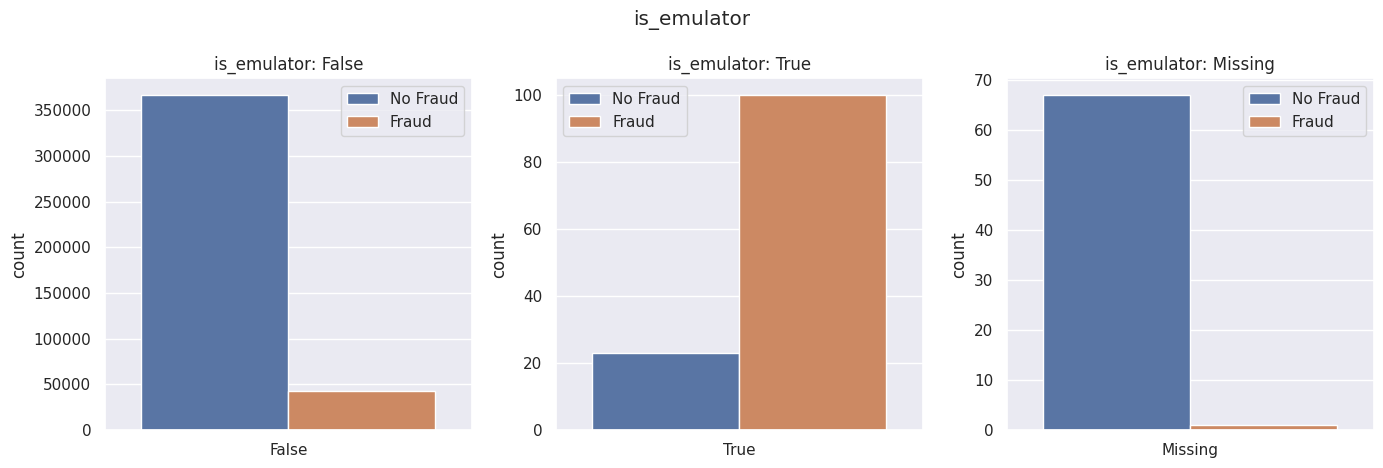

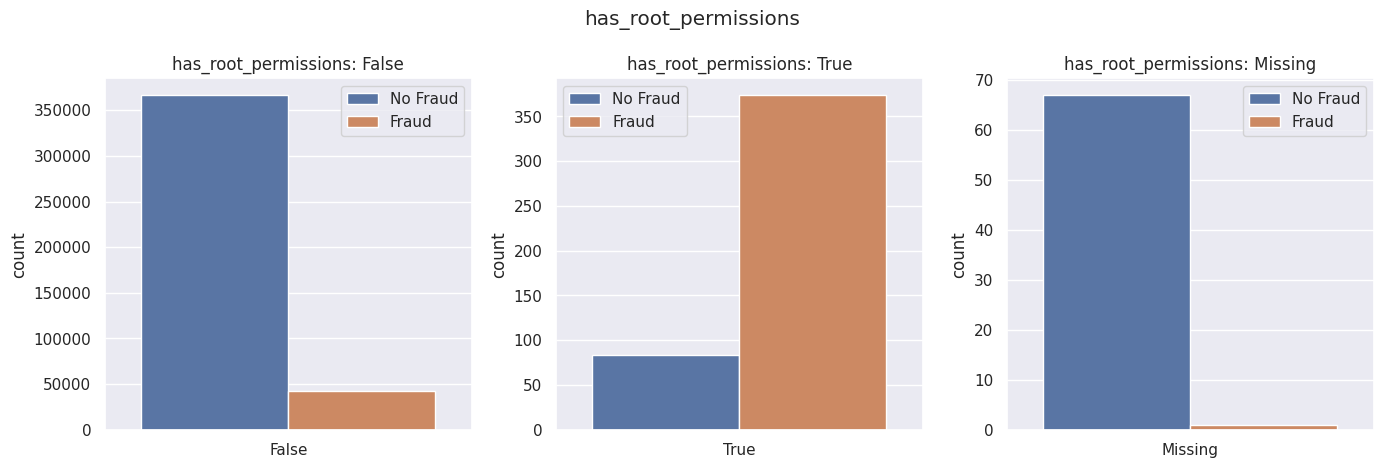

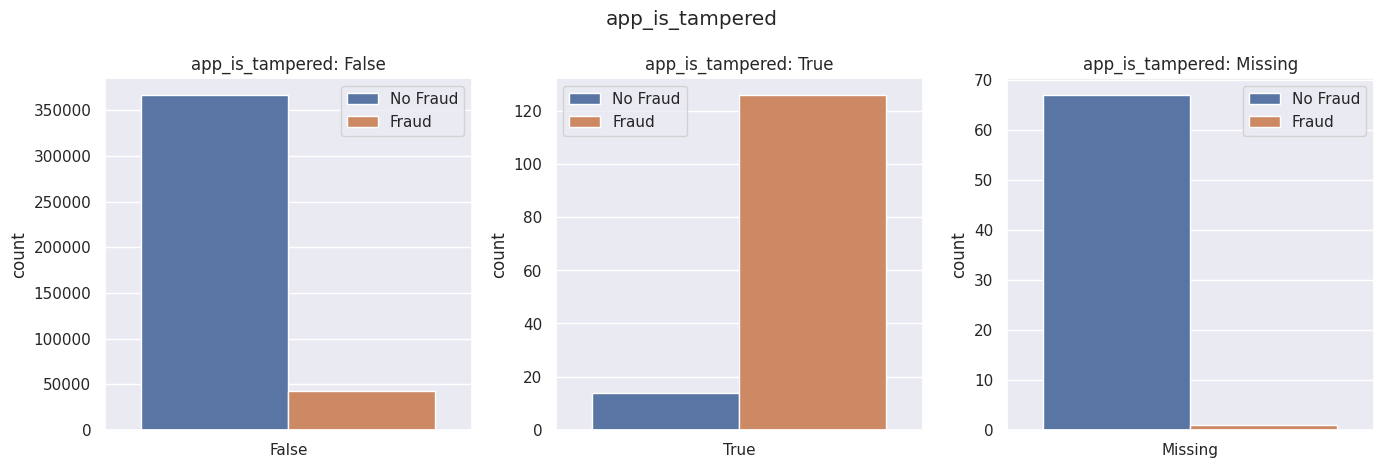

In [28]:
# Barplot: Checking imbalanced data in boolean features
sns.set(style="darkgrid")

for fea in missing_fea_bool:

  df_imba = df.groupby([fea, 'fraud'],dropna=False).agg({'fraud': ['count']})
  df_imba.columns = ['count']
  df_imba = df_imba.reset_index()
  df_imba[fea] = df_imba[fea].astype("string")
  df_imba[fea] = df_imba[fea].fillna('Missing')
  missing = df_imba[df_imba[fea]=="Missing"].value_counts().count()

  fig, ax = plt.subplots(1, 3, figsize=(14, 5), sharey=False)
  fig.suptitle(fea)

  sns.barplot(ax=ax[0], x=fea, y=df_imba['count']
              ,hue='fraud'
              ,data=df_imba[df_imba[fea]=='False']
              ,errorbar=None)
  fig.tight_layout()
  ax[0].legend(title='',labels=['No Fraud','Fraud'])
  ax[0].set_title(f'{fea}: False')
  ax[0].set(xlabel=None)

  sns.barplot(ax=ax[1], x=fea, y=df_imba['count']
              ,hue='fraud'
              ,data=df_imba[df_imba[fea]=='True']
              ,errorbar=None)
  fig.tight_layout()
  ax[1].legend(title='',labels=['No Fraud','Fraud'])
  ax[1].set_title(f'{fea}: True')
  ax[1].set(xlabel=None)

  sns.barplot(ax=ax[2], x=fea, y=df_imba['count']
              ,hue='fraud'
              ,data=df_imba[df_imba[fea]=='Missing']
              ,errorbar=None)
  fig.tight_layout()
  ax[2].legend(title='',labels=['No Fraud','Fraud'])
  ax[2].set_title(f'{fea}: Missing')
  ax[2].set(xlabel=None)

#### __The nature of the data and the analysis goals__
Considering that dropping rows is not the best strategy, we could consider adopting an imputation technique, but in different ways for boolean and float variables.

For boolean variables, the choice of imputation technique for missing values largely __depends on the nature of the data and the analysis goals__. Considering that we are dealing with banking transactions, the tendency would be to consider the lack of information as a positive value for these variables, but according to the graphs above, using this tendency would be a mistake because only 1 of 68 missing values resulted in fraud (1.5%), a much lower rate if we consider the representation of fraud in relation to the total (10% as we will see in the next sections).

Therefore, imputing a positive value would harm the analysis of boolean variables due to imbalanced data, so we will follow the good practices and perform an __imputation with the mode__ (which is 0), but without losing information about where the missing value is. In order to not lose this information, variables will be created to record where missing values were found before inputing with mode.

#### Imputation technique

Summary of the missing value filling technique to be used.:

- __Boolean variables__: Filling missing values with mode
- __Float variable__: Filling missing values with a machine learning model (KNN)

##### Marking missing values:

Before the imputation technique, due to keep track of where NaN values were located, a new boolean column will be added for each feature indicating whether a value was missing or not.

In [29]:
# Table: boolean column added for each feature with missing values indicating whether a value was missing or not
df['na_is_emulator'] = df['is_emulator'].isna()
df['na_has_root_permissions'] = df['has_root_permissions'].isna()
df['na_app_is_tampered'] = df['app_is_tampered'].isna()
df['na_distance_to_frequent_location'] = df['distance_to_frequent_location'].isna()

na_fea = ['na_is_emulator','na_is_emulator','na_has_root_permissions','na_app_is_tampered','na_distance_to_frequent_location']
df[na_fea].head()

na_is_emulator  na_is_emulator  na_has_root_permissions  \
0           False           False                    False   
1           False           False                    False   
2           False           False                    False   
3           False           False                    False   
4           False           False                    False   

   na_app_is_tampered  na_distance_to_frequent_location  
0               False                             False  
1               False                             False  
2               False                             False  
3               False                             False  
4               False                             False

##### Boolean variables: Filling missing values with mode

In [30]:
# Checking the mode
df[missing_fea_bool].mode()

is_emulator has_root_permissions app_is_tampered
0       False                False           False

In [31]:
# Using the fillna() method to replace NaN values with mode.
df[missing_fea_bool] = df[missing_fea_bool].fillna(False)

In [32]:
# checking if missing values have been eliminated
df[missing_fea_bool].isna().sum()

is_emulator             0
has_root_permissions    0
app_is_tampered         0
dtype: int64

##### Float variable: Filling missing values with a machine learning model (KNN)

Using a __k-nearest neighbors (KNN)__ model for imputing missing values in float variables (distance_to_frequent_location) is a reasonable and data-driven approach.

In [33]:
# Import KNNImputer library
from sklearn.impute import KNNImputer

In [34]:
# KNN imputer model
imputer = KNNImputer(n_neighbors=5)
knn_features = ['distance_to_frequent_location',
                'device_age_days',
                'has_fake_location',
                'client_decision_bol',
                'is_emulator',
                'has_root_permissions',
                'app_is_tampered',
                'transaction_value',
                'fraud']
df_knn = imputer.fit_transform(df[knn_features])
df[knn_features] = pd.DataFrame(df_knn, columns=knn_features)

In [35]:
# During the KNN Model, all boolean variables were converted to float, so let's convert it back to boolean.
df['is_emulator'] = (df['is_emulator'] * 1).astype('bool')
df['has_fake_location'] = (df['has_fake_location'] * 1).astype('bool')
df['has_root_permissions'] = (df['has_root_permissions'] * 1).astype('bool')
df['app_is_tampered'] = (df['app_is_tampered'] * 1).astype('bool')
df['client_decision_bol'] = (df['client_decision_bol'] * 1).astype('bool')

In [36]:
# Table: Checking imputed values where they were missing
df[df['na_distance_to_frequent_location']==True]

transaction_id   transaction_timestamp  account_id   device_id  \
418     003c6045-63cf 2023-08-24 17:31:25.869    56304091  1001884985   
698     01bee640-6acf 2023-08-17 13:43:57.646  1378028352  1003180460   
704     0312b99b-1846 2023-08-27 01:07:54.909  1624435077  1003195772   
815     0158832f-3dbe 2023-08-20 02:11:08.121  1083848642  1003758856   
1440    023f22ac-89e0 2023-08-09 17:38:45.698   199818704  1006566339   
...               ...                     ...         ...         ...   
407423  009ea8f6-a2b0 2023-08-09 17:40:06.224   130582247   990408060   
407466  01daf4c7-e82b 2023-08-15 21:18:08.633   190514502    99058861   
407610  014c5f32-c49c 2023-08-30 22:19:05.110    68567989    99104820   
408129  02ea84f8-08bb 2023-08-29 15:25:54.070  1902180105   993572644   
408934  5295f15b-c211 2023-08-13 18:05:05.042  2042192166   997378638   

        distance_to_frequent_location  device_age_days  is_emulator  \
418                       1055.773333              0.0        False   
698                         71.506605              0.0        False   
704                       1878.502871            348.0        False   
815                       1397.546387            346.0        False   
1440                      2088.458019              0.0        False   
...                               ...              ...          ...   
407423                    1150.346322            325.0        False   
407466                    8794.910518              0.0        False   
407610                    5513.997229              0.0        False   
408129                       3.578492              0.0        False   
408934                  304244.450128              0.0        False   

        has_fake_location  has_root_permissions  app_is_tampered  \
418                 False                 False            False   
698                 False                 False            False   
704                 False                 False            False   
815                 False                 False            False   
1440                False                 False            False   
...                   ...                   ...              ...   
407423              False                 False            False   
407466              False                 False            False   
407610              False                 False            False   
408129              False                 False            False   
408934              False                  True            False   

        transaction_value client_decision  client_decision_bol  fraud  \
418            129.994162        approved                 True    0.0   
698            116.995660          denied                False    0.0   
704            232.142091          denied                False    0.0   
815             97.915682          denied                False    0.0   
1440            80.739061        approved                 True    0.0   
...                   ...             ...                  ...    ...   
407423         231.812751        approved                 True    0.0   
407466          70.198200        approved                 True    0.0   
407610         117.667682        approved                 True    0.0   
408129         105.772677          denied                False    0.0   
408934         288.075399          denied                False    1.0   

        na_is_emulator  na_has_root_permissions  na_app_is_tampered  \
418              False                    False               False   
698              False                    False               False   
704              False                    False               False   
815              False                    False               False   
1440             False                    False               False   
...                ...                      ...                 ...   
407423           False                    False               False   
407466         

## Data Visualization
Creating various plots and charts to explore data visually.

### Variable Importance

In this section, we will check the representativeness of "fraud" variable.

For financial risk assessment, having a representative target variable (fraud) is essential to accurately assess and mitigate risks. Biased data can lead to underestimating or overestimating risks, which can have significant real-world consequences.

Text(0.5, 1.0, 'Representativeness of fraud variable')

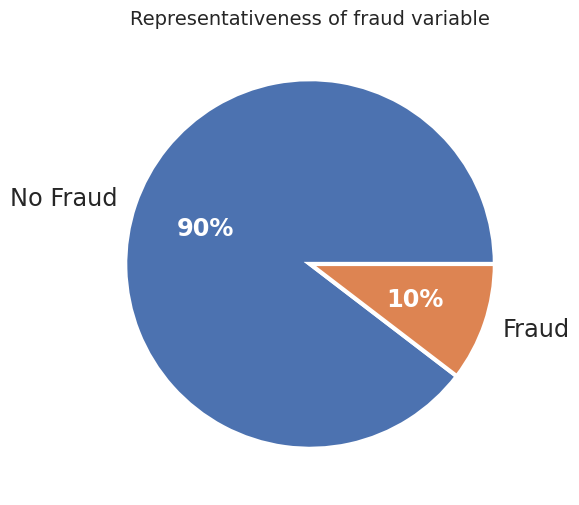

In [37]:
# Pie chart: Representativeness of "fraud" variable
plt.figure(figsize=(6,6))
df_pie = df.groupby(['fraud']).agg({'fraud': ['count']})
df_pie.columns = ['count']
df_pie = df_pie.reset_index()
df_pie['fraud'] = df_pie['fraud'].replace([0,1],['No Fraud','Fraud'])
data = df_pie['count']
labels = df_pie["fraud"]

patches, texts, pcts = plt.pie(data
    ,labels=labels
    ,autopct='%.0f%%'
    ,wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}
    ,counterclock=True
    ,textprops={'size': 'x-large'}
    )
plt.setp(pcts, color='white', fontweight='bold')
plt.title(f'Representativeness of fraud variable',fontsize=14)

### Fraud rate analysis

In the table below we cross-reference the information from the `Fraud` variable with the `client_decision` variable, to understand how successful or wrong two-factor authentication (2FA) process is.
we can observe a high number of false positives and false negatives, which justifies carrying out this work to improve the client's accuracy.

In [38]:
# Calculating the fraud rate
fraud_rate = df['fraud'].mean()
percentage_value = "{:.2%}".format(fraud_rate)

# Showing the fraud rate
print("Fraude rate:",percentage_value)

Fraude rate: 10.39%


In [39]:
# Table: client_decision per fraud response and fraud rate
df_gp = df.groupby(['client_decision', 'fraud']).agg({'fraud': ['count']})
df_gp.columns = ['count']
df_gp = df_gp.reset_index()
df_gp = df_gp.pivot_table('count', ['client_decision'], 'fraud')
df_gp = df_gp.rename(columns={0: 'No Fraud', 1: 'Fraud'})
df_gp['Total'] = df_gp['Fraud'] + df_gp['No Fraud']
df_gp['Fraud Rate'] = df_gp['Fraud'] / df_gp['Total']
df_gp['Fraud Rate'] = df_gp['Fraud Rate'].transform(lambda x: '{:,.2%}'.format(x))
df_gp

fraud            No Fraud  Fraud   Total Fraud Rate
client_decision                                    
approved           238219  27527  265746     10.36%
denied             128668  15014  143682     10.45%

> In addition, the fraud rate is about the same (10%) for transactions that are approved and denied in two-factor authentication (2FA) process, and this can have important implications for data analysis and transaction security. This situation often suggests that the fraud detection system may not be working effectively or that the criteria used to approve or deny transactions may not be adequately considering fraud risks.

### Checking the spread of the numeric features

Checking the spread of numeric features helps in identifying outliers, which may be due to data entry errors, measurement errors, or rare but important events.

In [40]:
# Numeric feature selection
numeric_fea = ['distance_to_frequent_location',
               'device_age_days',
               'transaction_value']

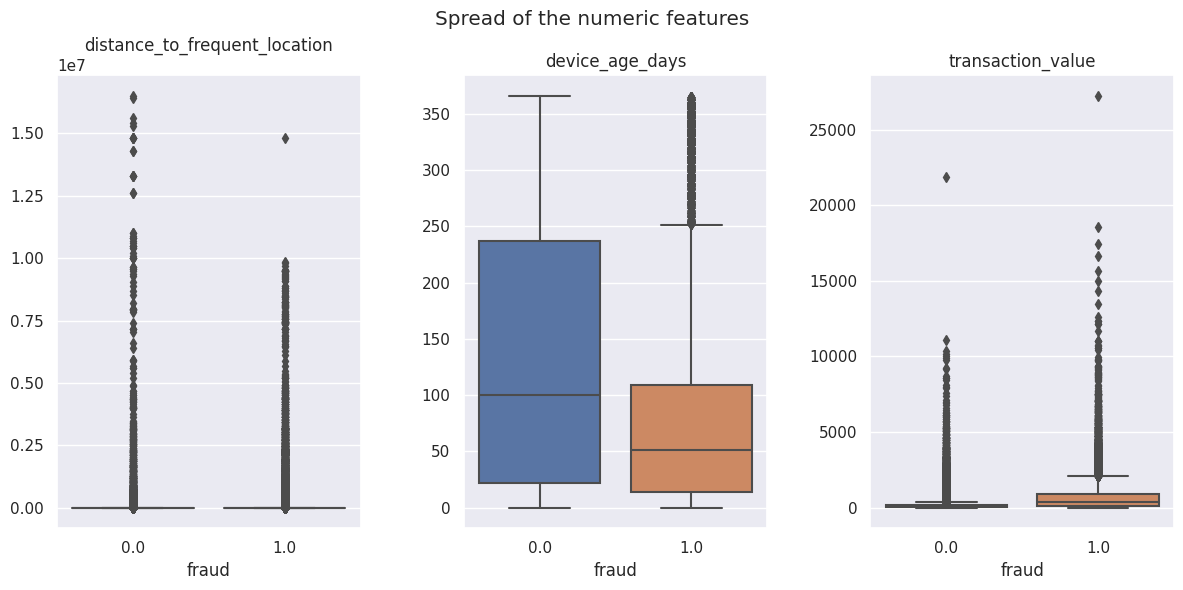

In [41]:
# Boxplots: Spread of the numeric features per fraud response
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=False)
fig.suptitle('Spread of the numeric features')

for i in range(len(numeric_fea)):
  sns.boxplot(ax=axes[i], x='fraud', y=numeric_fea[i], data=df)
  fig.tight_layout()
  axes[i].set_title(numeric_fea[i])
  axes[i].set(ylabel=None)


### Filtering outliers
In the banking transaction scenario, outliers can be important events that need to be highlighted. Therefore, instead of removing the outliers, we will just filter to be able to observe the data better.

#### Filtering Description:
- For each column, it first computes the Z-score of each value in the column, relative to the column mean and standard deviation.
- It then takes the absolute Z-score because the direction does not matter, only if it is below the threshold.
- Checking if values are within 3 standard deviations from the mean.
- Creating new variables to store the information if the value is greater than 3 standard deviations from the mean, it will be filled with TRUE which means it is an outlier.

> This information will be important later when creating risk classification rules. 2 and 3 standard deviations from the mean can be excellent thresholds.

> __3 Standard Deviations (3σ)__: This is often referred to as the "68-95-99.7" rule, where approximately 99.7% of the data falls within 3 standard deviations of the mean. Values beyond 3 standard deviations from the mean are considered outliers. This is a strict criterion and may identify only extreme outliers.

In [42]:
from scipy import stats

In [43]:
# Calculating Z-Score for device_age_days
df['device_age_days_z_score'] = np.abs(stats.zscore(df['device_age_days']))

# Setting a threshold to identify outliers in device_age_days
threshold_z = 2

# Marking the outliers in a new column
df['device_age_days_outlier'] = df['device_age_days_z_score'] > threshold_z

# Results
df['device_age_days_outlier'].value_counts()

False    409009
True        419
Name: device_age_days_outlier, dtype: int64

In [44]:
# Calculating Z-Score for distance_to_frequent_location
df['distance_to_frequent_location_z_score'] = np.abs(stats.zscore(df['distance_to_frequent_location']))

# Setting a threshold to identify outliers in distance_to_frequent_location
threshold_z = 3

# Marking the outliers in a new column
df['distance_to_frequent_location_outlier'] = df['distance_to_frequent_location_z_score'] > threshold_z

# Results
df['distance_to_frequent_location_outlier'].value_counts()

False    407574
True       1854
Name: distance_to_frequent_location_outlier, dtype: int64

In [45]:
# Calculating Z-Score for transaction_value
df['transaction_value_z_score'] = np.abs(stats.zscore(df['transaction_value']))

# Setting a threshold to identify outliers in transaction_value
threshold_z = 3

# Marking the outliers in a new column
df['transaction_value_outlier'] = df['transaction_value_z_score'] > threshold_z

# Results
df['transaction_value_outlier'].value_counts()

False    402030
True       7398
Name: transaction_value_outlier, dtype: int64

 ### Checking the spread of the numeric features __without the outliers__

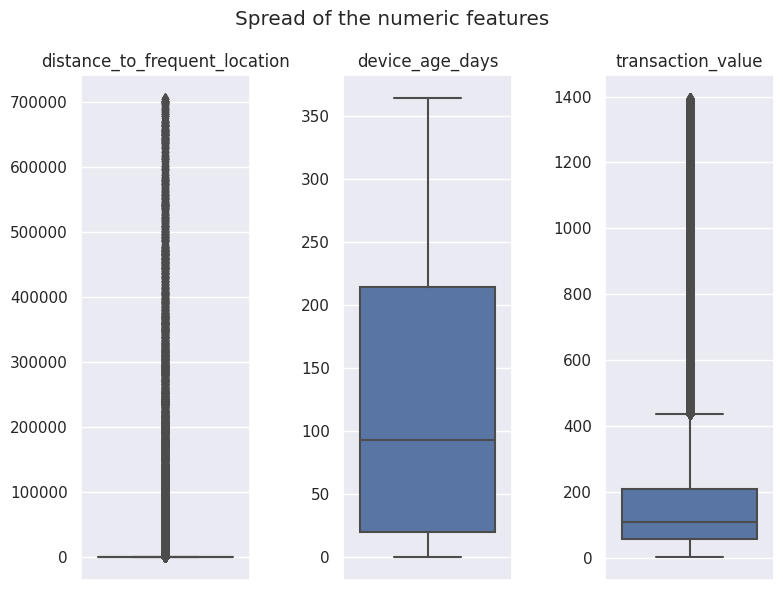

In [46]:
# Boxplots: Spread of the numeric features after filter outliers
fig, axes = plt.subplots(1, 3, figsize=(8, 6), sharey=False)
fig.suptitle('Spread of the numeric features')

i=0
for fea in numeric_fea:
  sns.boxplot(ax=axes[i], y=fea, data=df[df[f'{fea}_outlier']==False])
  fig.tight_layout()
  axes[i].set_title(fea)
  axes[i].set(ylabel=None)
  i=i+1


> According to the boxplots above, __there are still outliers__ for __"distance_to_frequent_location"__ and __"transaction_value"__ even after filtering everything outside 3 standard deviations from the mean.

> Therefore, for these features we will use another strategy: __Binning__, which is a reasonable approach to handle a continuous variable like these and group values into categories to simplify the analysis. Grouping distances and monetary value into intervals of `(10-100, 100-1.000, ...)` can be a practical and straightforward way to create meaningful categories.



In [47]:
# Creating bin edges and labels
edges_m = [0, 10, 100, 1000, 10000, 100000, 100000000]
edges_r = [0, 10, 100, 1000, 1000000]
labels_m = ['0-10', '11-100', '101-1.000', '1.001-10.000', '10.001-100.000','100.001-(...)']
labels_r = ['0-10', '11-100', '101-1.000', '1.001-(...)']

df['distance_to_frequent_location_cut'] = pd.cut(df['distance_to_frequent_location'], bins=edges_m, labels=labels_m, include_lowest=True)
df['transaction_value_cut'] = pd.cut(df['transaction_value'], bins=edges_r, labels=labels_r, include_lowest=True)

### Distribution range of the numeric features

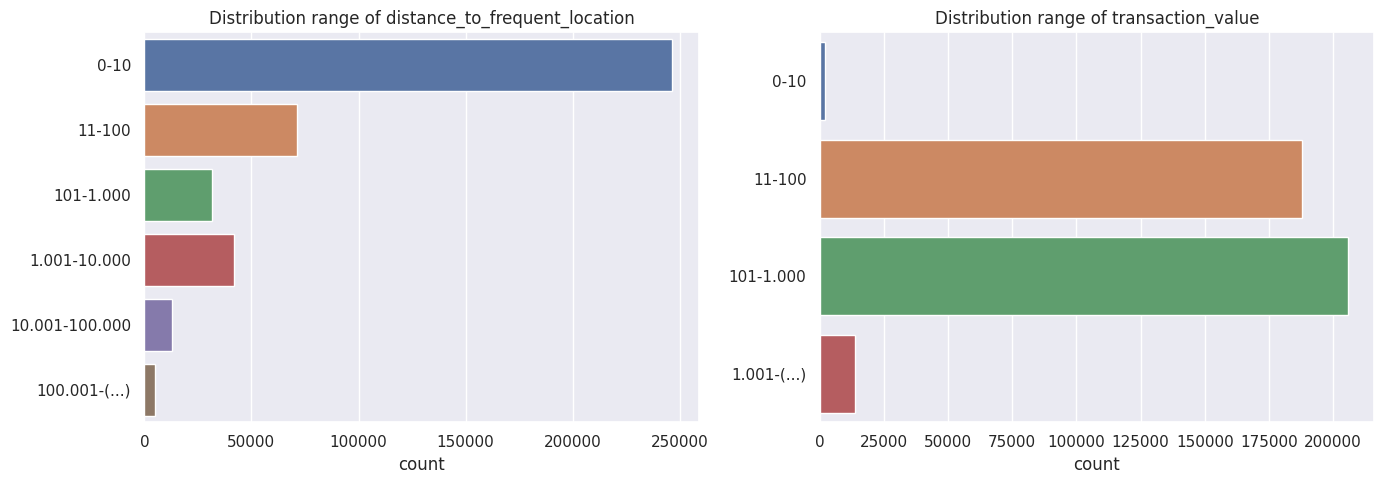

In [48]:
# Catplot: Distribution range of the numeric features
cut_fea = ['distance_to_frequent_location_cut','transaction_value_cut']
f, ax = plt.subplots(figsize=(14, 5))

plt.subplot(1, 2, 1)
ax1 = sns.countplot(df, y="distance_to_frequent_location_cut")
ax1.set(title='Distribution range of distance_to_frequent_location')
ax1.set(ylabel=None)
plt.subplot(1, 2, 2)
ax1 = sns.countplot(df, y="transaction_value_cut")
ax1.set(title='Distribution range of transaction_value')
ax1.set(ylabel=None)
plt.tight_layout()

> In short, instead of treating "`distance_to_frequent_location`" and "`transaction_value`" as a continuous variable, we discretize them into categories. This helped simplify the analysis and reduce the impact of extreme values within each category.

### Distribution between boolean features.

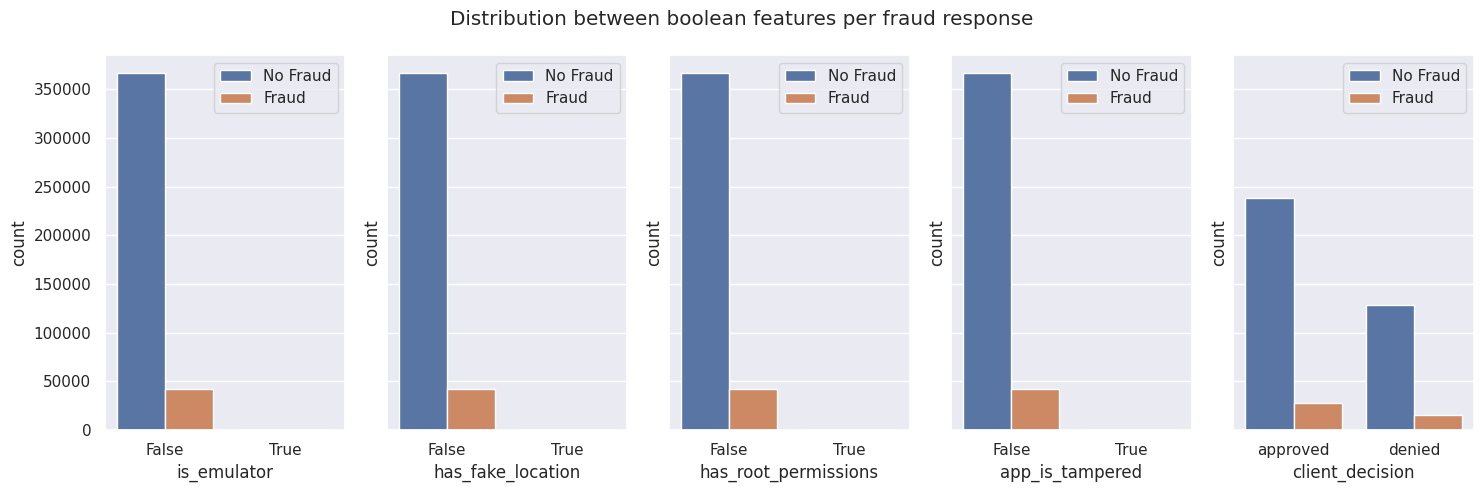

In [49]:
# Boolean feature selection
boolean_fea = ['is_emulator',
                'has_fake_location',
                'has_root_permissions',
                'app_is_tampered',
               'client_decision']

# Barplot: Distribution between boolean features per fraud response
sns.set(style="darkgrid")
fig, ax = plt.subplots(1, 5, figsize=(15, 5), sharey=True)
fig.suptitle('Distribution between boolean features per fraud response')
i=0
for fea in boolean_fea:

  df_bar = df.groupby([fea, 'fraud']).agg({'fraud': ['count']})
  df_bar.columns = ['count']
  df_bar = df_bar.reset_index()
  sns.barplot(ax=ax[i], x=fea, y=df_bar['count']
              ,hue='fraud'
              ,data=df_bar
              ,errorbar=None)
  fig.tight_layout()
  ax[i].legend(title='',labels=['No Fraud','Fraud'])
  #ax[i].set_title(fea)
  #ax[i].set(xlabel=None)
  i=i+1

Except for the `client_decision` variable, the number of positive (True) values __are so small that they don't even appear in the bar charts above__, so below is a table showing this difference in numbers, and then the same projection in a bar charts only with a positive class of each variable.

In [50]:
# Boolean feature selection
boolean_fea = ['is_emulator',
                'has_fake_location',
                'has_root_permissions',
                'app_is_tampered',
               'client_decision_bol']

# Pivot Table: Class distribution between boolean features
df_dist = pd. DataFrame()
for fea in boolean_fea:
  df_piv = df.groupby([fea]).agg({fea: ['count']})
  df_piv.columns = ['count']
  df_piv = df_piv.reset_index()
  df_piv[fea] = df_piv[fea].astype('bool')
  df_piv = pd.melt(df_piv, id_vars=['count'], value_vars=[fea], value_name='True/False')
  df_dist = pd.concat([df_dist, df_piv], ignore_index=True)

df_dist = df_dist.reindex(columns=['variable', 'True/False', 'count']) #.style.hide_index()
df_dist = df_dist.pivot_table('count', ['True/False'], 'variable')
df_dist

variable    app_is_tampered  client_decision_bol  has_fake_location  \
True/False                                                            
False                409288               143682             409223   
True                    140               265746                205   

variable    has_root_permissions  is_emulator  
True/False                                     
False                     408971       409305  
True                         457          123

### Distribution between boolean features (Only TRUE class) per fraud response

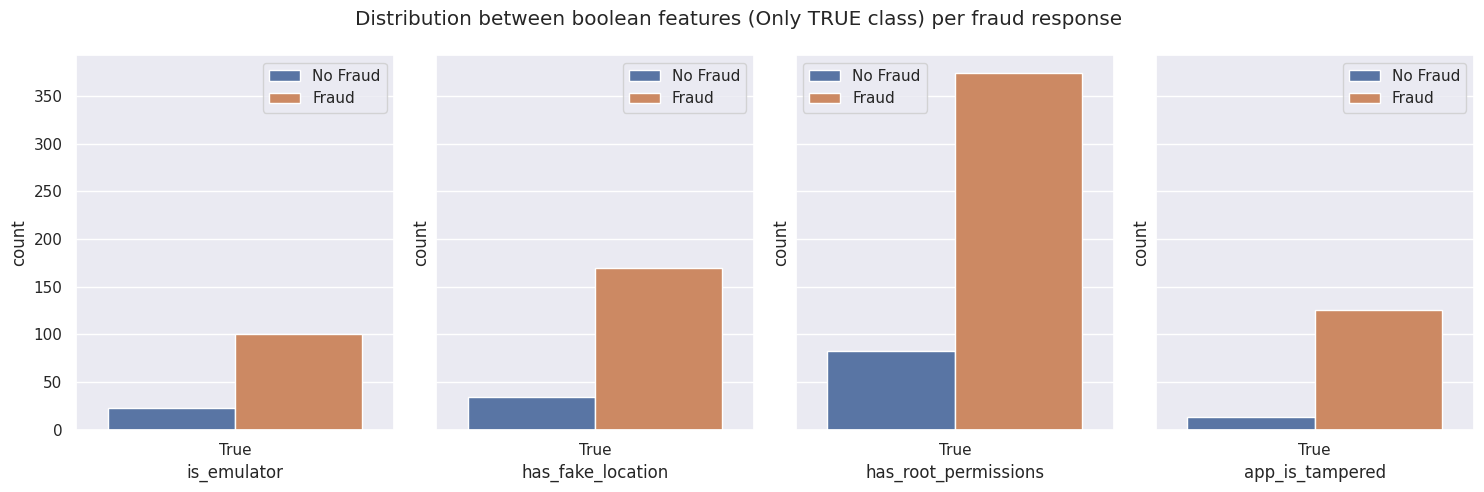

In [51]:
# Barplot: Distribution between boolean features (Only TRUE class) per fraud response
boolean_fea = ['is_emulator',
                'has_fake_location',
                'has_root_permissions',
                'app_is_tampered']
sns.set(style="darkgrid")
fig, ax = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
fig.suptitle('Distribution between boolean features (Only TRUE class) per fraud response ')
i=0
for fea in boolean_fea:

  df_tru = df.groupby([fea, 'fraud']).agg({'fraud': ['count']})
  df_tru.columns = ['count']
  df_tru = df_tru.reset_index()

  sns.barplot(ax=ax[i], x=fea, y=df_tru['count']
              ,hue='fraud'
              ,data=df_tru[df_tru[fea]==1]
              ,errorbar=None)
  ax[i].legend(title='',labels=['No Fraud','Fraud'])
  fig.tight_layout()
  i=i+1

> Except for the *client_decision* variable, all Boolean variables have a low rate of occurrence, but when they do occur, **the probability of being fraud is very high**.

### Risk rate when the class is TRUE in Boolean variables.

In [52]:
# Table: Risk rate when the class is TRUE in Boolean variables.
df_dist = pd. DataFrame()
for fea in boolean_fea:

  df_piv = df.groupby([fea,'fraud']).agg({fea: ['count']})
  df_piv.columns = ['count']
  df_piv = df_piv.reset_index()
  df_piv['fraud'] = df_piv['fraud'].astype('bool')
  df_piv = pd.melt(df_piv, id_vars=['count','fraud'], value_vars=[fea], value_name='Var valor')
  #df_piv
  df_dist = pd.concat([df_dist, df_piv], ignore_index=True)

df_dist = df_dist.reindex(columns=['fraud','variable', 'Var valor', 'count']) #.style.hide_index()
df_dist = df_dist[df_dist['Var valor']==True]
df_dist = df_dist.drop(['Var valor'],axis=1)
df_dist = df_dist.pivot_table('count', ['variable'], 'fraud')
df_dist['Total'] = df_dist[True] + df_dist[False]
df_dist['Fraud Rate'] = df_dist[True] / df_dist['Total']
df_dist['Fraud Rate'] = df_dist['Fraud Rate'].transform(lambda x: '{:,.2%}'.format(x))
df_dist

fraud                 False  True  Total Fraud Rate
variable                                           
app_is_tampered          14   126    140     90.00%
has_fake_location        35   170    205     82.93%
has_root_permissions     83   374    457     81.84%
is_emulator              23   100    123     81.30%

## Multivariate Analysis

### Investigating the interactions between numeric variables.
- distance_to_frequent_location
- device_age_days
- transaction_value

Text(0.5, 1, 'Correlation between numeric features')

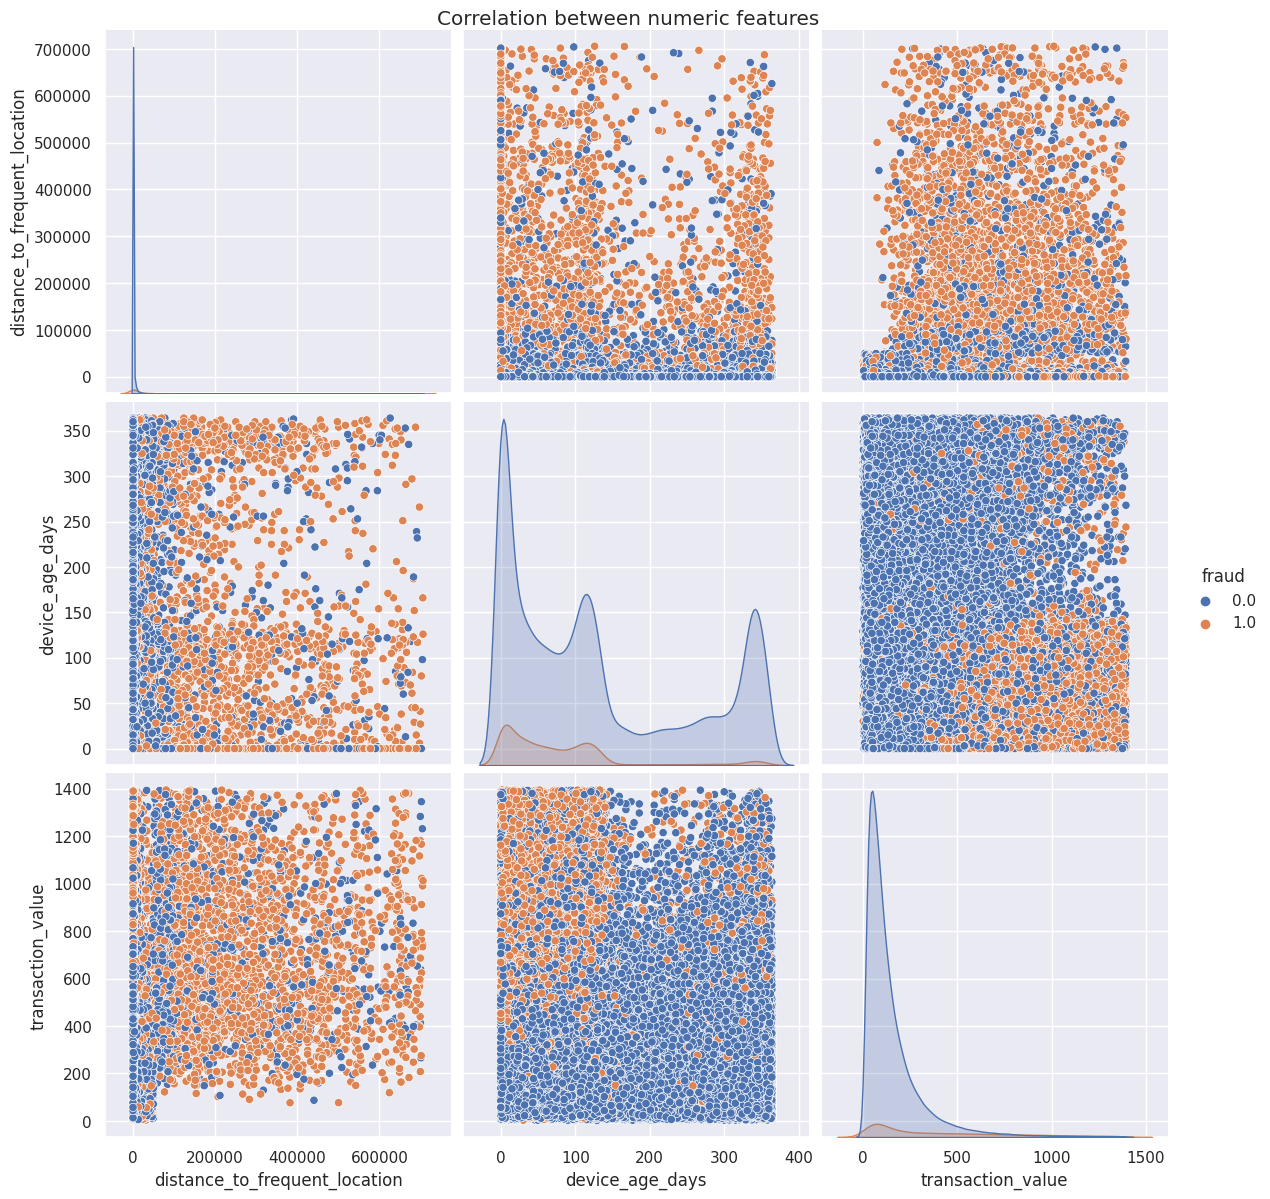

In [53]:
# Pairplot: Correlation between numeric features
fea_cor = ['distance_to_frequent_location',
           'device_age_days',
           'transaction_value',
           'fraud']
select = df[(df['distance_to_frequent_location_outlier']==False) & (df['device_age_days_outlier']==False) & (df['transaction_value_outlier']==False)]
select = select[fea_cor]

g = sns.pairplot(select, hue="fraud", height=4)
g.fig.suptitle('Correlation between numeric features', y=1)

> According to the scatterplots above, there is practically no trend between the numerical variables, even disregarding the outliers, the data remains quite spread out, making it not possible to make any inferences here.

## Time-Series Analysis
Examining trends, seasonality, and cyclical patterns in time-series data.

### Transaction per Date and Fraud response

In [54]:
# Creating a date variable from timestamp variable
df['transaction_date'] = df['transaction_timestamp'].dt.date

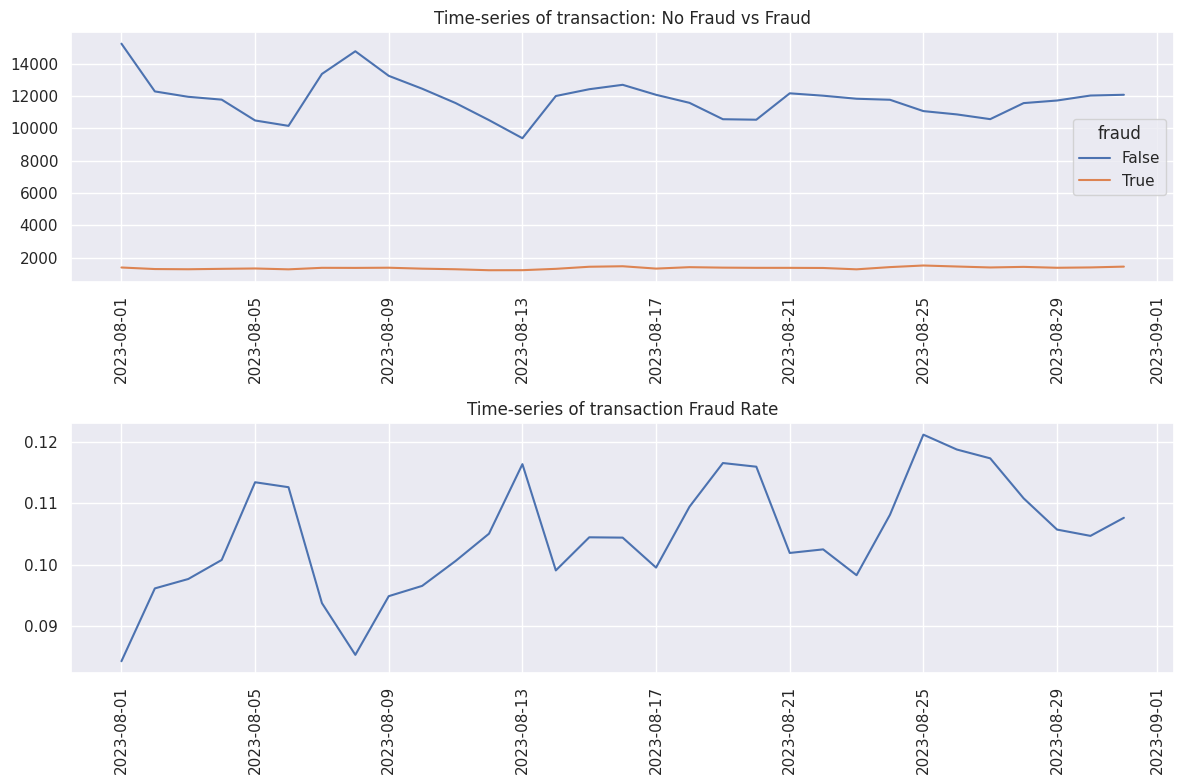

In [55]:
# Lineplot: Time-series of transaction_date per fraud response
df_ts = df.groupby(['transaction_date', 'fraud']).agg({'fraud': ['count']})
df_ts.columns = ['count']
df_ts = df_ts.reset_index()
df_ts['fraud'] = df_ts['fraud'].replace([0,1],['False','True'])
df_ts2 = df_ts.pivot_table('count', ['transaction_date'], 'fraud')
df_ts2['Total'] = df_ts2['True'] + df_ts2['False']
df_ts2['Fraud Rate'] = df_ts2['True'] / df_ts2['Total']

f, ax = plt.subplots(figsize=(12, 8))

plt.subplot(2, 1, 1)
ax1 = sns.lineplot(x = "transaction_date", y = 'count', data = df_ts, hue='fraud')
plt.xticks(rotation = 90)
ax1.set_title('Time-series of transaction: No Fraud vs Fraud')
ax1.set(xlabel=None)
ax1.set(ylabel=None)

plt.subplot(2, 1, 2)
ax1 = sns.lineplot(x = "transaction_date", y = 'Fraud Rate', data = df_ts2)
plt.xticks(rotation = 90)
ax1.set_title('Time-series of transaction Fraud Rate')
ax1.set(xlabel=None)
ax1.set(ylabel=None)

plt.tight_layout()
plt.show()

> We can observe in the time-series above that there is a certain seasonality during the 1-month interval, indicating that the volume of transactions changes according to the day of the week.

### Transactions per Day of the Week

In [56]:
# Creating a Day of the Week variable from timestamp variable. (0-Mon, 1-Tue,...6-Sun)
df['transaction_weekday'] = df['transaction_timestamp'].dt.dayofweek.astype('string') + "-" + df['transaction_timestamp'].dt.day_name().str[:3]

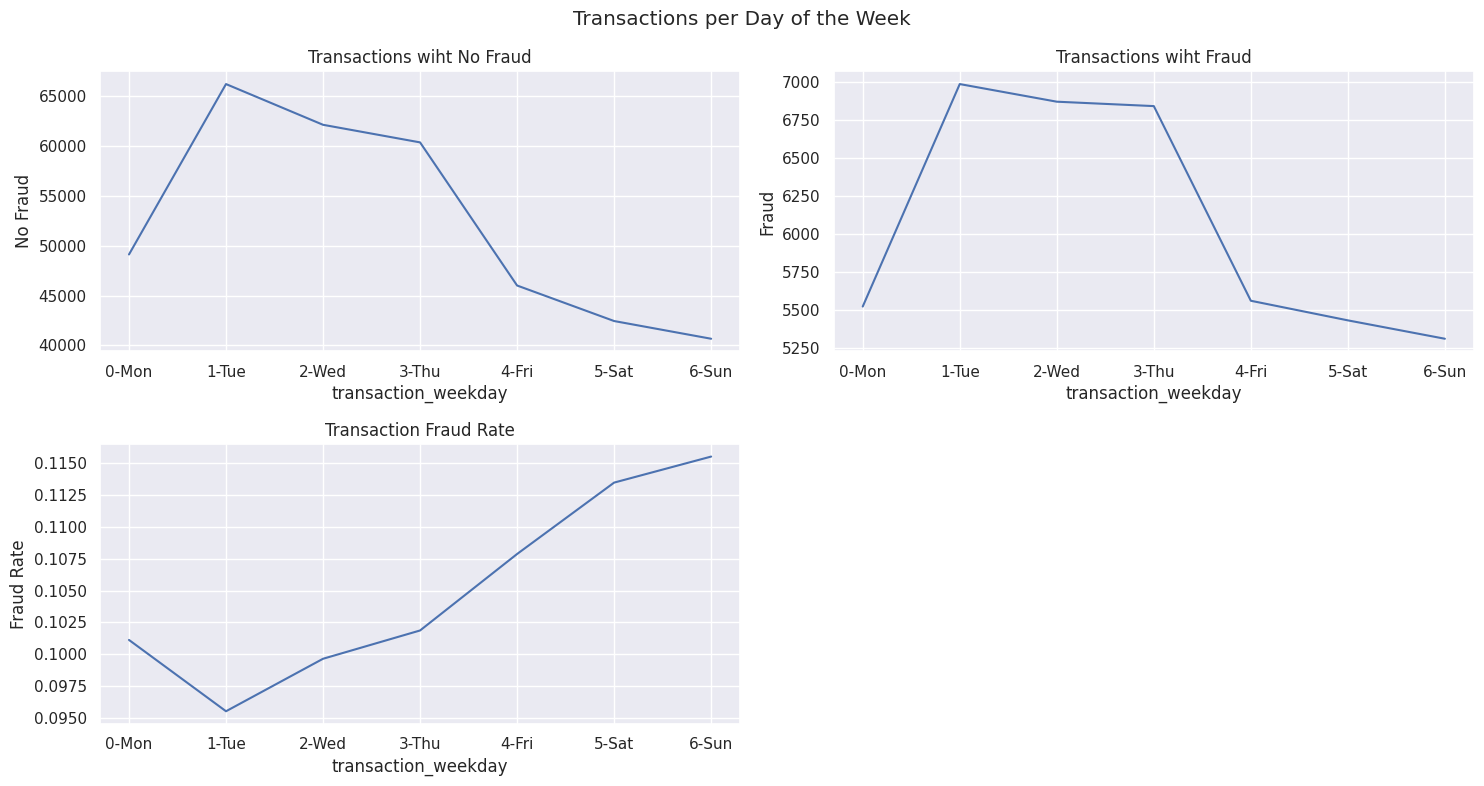

In [57]:
# Lineplot: Transactions per weekday
df_wd = df.groupby(['transaction_weekday', 'fraud']).agg({'fraud': ['count']})
df_wd.columns = ['count']
df_wd = df_wd.reset_index()
df_wd = df_wd.pivot_table('count', ['transaction_weekday'], 'fraud')
df_wd = df_wd.rename(columns={0: 'No Fraud', 1: 'Fraud'})
df_wd['Total'] = df_wd['Fraud'] + df_wd['No Fraud']
df_wd['Fraud Rate'] = df_wd['Fraud'] / df_wd['Total']

f, ax = plt.subplots(figsize=(15, 8))
f.suptitle('Transactions per Day of the Week')
plt.subplot(2, 2, 1)
ax1 = sns.lineplot(x = "transaction_weekday", y = 'No Fraud', data = df_wd)
ax1.set_title('Transactions wiht No Fraud')
plt.subplot(2, 2, 2)
ax1 = sns.lineplot(x = "transaction_weekday", y = 'Fraud', data = df_wd)
ax1.set_title('Transactions wiht Fraud')
plt.subplot(2, 2, 3)
ax1 = sns.lineplot(x = "transaction_weekday", y = 'Fraud Rate', data = df_wd)
ax1.set_title('Transaction Fraud Rate')
plt.tight_layout()
plt.show()

In [58]:
# Table: Transactions per weekday and fraud rate
df_wd['Fraud Rate'] = df_wd['Fraud Rate'].transform(lambda x: '{:,.2%}'.format(x))
df_wd

fraud                No Fraud  Fraud  Total Fraud Rate
transaction_weekday                                   
0-Mon                   49116   5525  54641     10.11%
1-Tue                   66191   6989  73180      9.55%
2-Wed                   62110   6873  68983      9.96%
3-Thu                   60347   6844  67191     10.19%
4-Fri                   46006   5563  51569     10.79%
5-Sat                   42446   5434  47880     11.35%
6-Sun                   40671   5313  45984     11.55%

> In the table and line graph above we can see that both the volume of transactions and fraud increase considerably between Tuesdays and Thursdays. However, if we consider the rate, this situation is reversed, and the days with the highest volume of transactions are the days with the lowest probability of fraud occurring. So, between Friday and Sunday we have the highest fraud rates, but it **is not a significant deviation from the mean** that needs to create **friction** for customers on those days.

### Transactions per Hour of the Day

In [59]:
# Creating a Hour variable from timestamp variable
df['transaction_hour'] = df['transaction_timestamp'].dt.hour

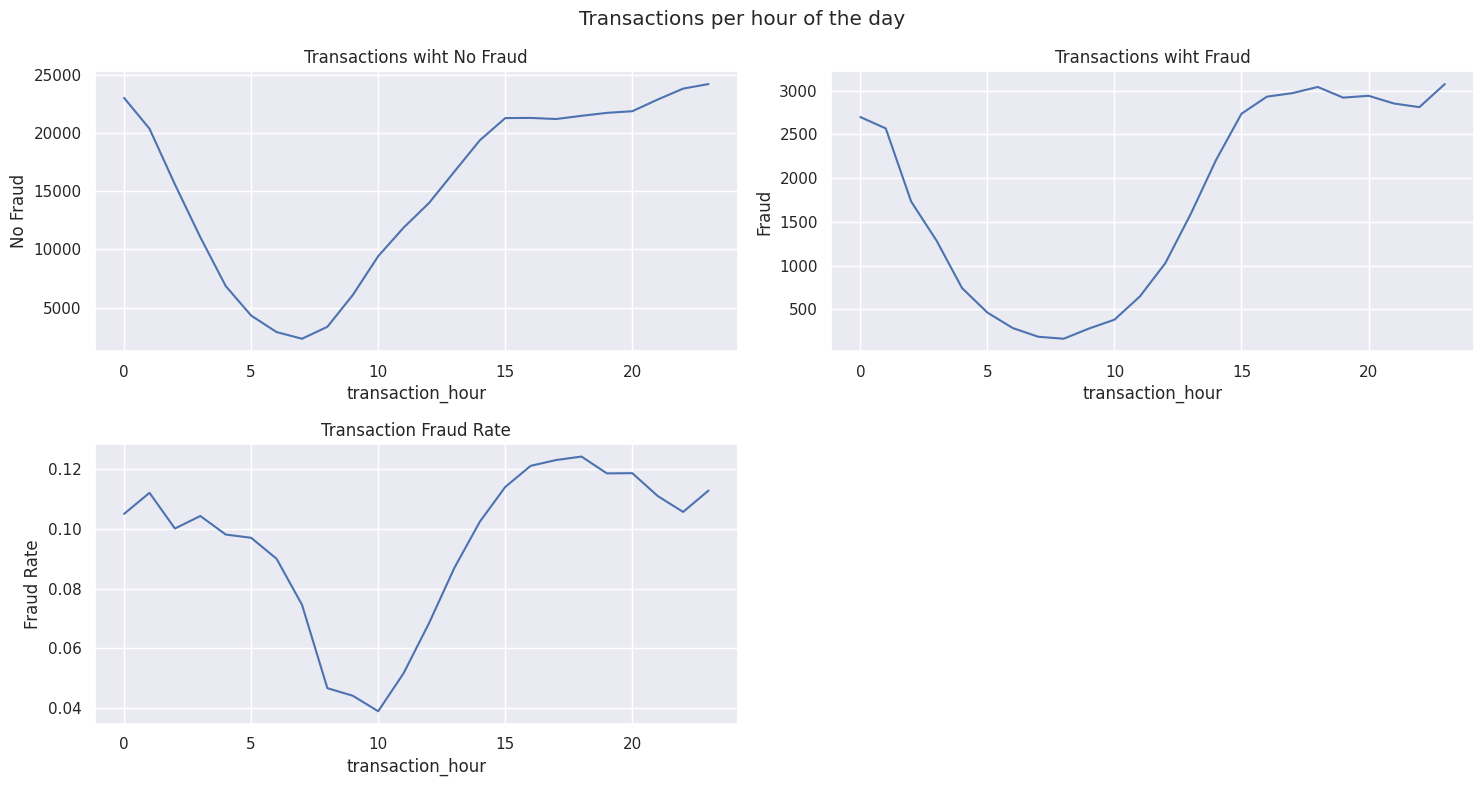

In [60]:
# Lineplot: Transactions per hour of the day
df_hr = df.groupby(['transaction_hour', 'fraud']).agg({'fraud': ['count']})
df_hr.columns = ['count']
df_hr = df_hr.reset_index()
df_hr = df_hr.pivot_table('count', ['transaction_hour'], 'fraud')
df_hr = df_hr.rename(columns={0: 'No Fraud', 1: 'Fraud'})
df_hr['Total'] = df_hr['Fraud'] + df_hr['No Fraud']
df_hr['Fraud Rate'] = df_hr['Fraud'] / df_hr['Total']

f, ax = plt.subplots(figsize=(15, 8))
f.suptitle('Transactions per hour of the day')
plt.subplot(2, 2, 1)
ax1 = sns.lineplot(x = "transaction_hour", y = 'No Fraud', data = df_hr)
ax1.set_title('Transactions wiht No Fraud')
plt.subplot(2, 2, 2)
ax1 = sns.lineplot(x = "transaction_hour", y = 'Fraud', data = df_hr)
ax1.set_title('Transactions wiht Fraud')
plt.subplot(2, 2, 3)
ax1 = sns.lineplot(x = "transaction_hour", y = 'Fraud Rate', data = df_hr)
ax1.set_title('Transaction Fraud Rate')
plt.tight_layout()
plt.show()

In [61]:
# Table: Transactions per hour of the day and fraud rate
df_hr['Fraud Rate %'] = df_hr['Fraud Rate'].transform(lambda x: '{:,.2%}'.format(x))
df_hr.drop(['Fraud Rate'],axis=1)

fraud             No Fraud  Fraud  Total Fraud Rate %
transaction_hour                                     
0                    23016   2698  25714       10.49%
1                    20368   2568  22936       11.20%
2                    15582   1732  17314       10.00%
3                    11044   1285  12329       10.42%
4                     6846    744   7590        9.80%
5                     4313    463   4776        9.69%
6                     2894    286   3180        8.99%
7                     2320    187   2507        7.46%
8                     3347    164   3511        4.67%
9                     6080    281   6361        4.42%
10                    9413    382   9795        3.90%
11                   11866    647  12513        5.17%
12                   13985   1027  15012        6.84%
13                   16689   1589  18278        8.69%
14                   19373   2208  21581       10.23%
15                   21282   2736  24018       11.39%
16                   21296   2931  24227       12.10%
17                   21201   2971  24172       12.29%
18                   21476   3042  24518       12.41%
19                   21731   2920  24651       11.85%
20                   21872   2941  24813       11.85%
21                   22875   2853  25728       11.09%
22                   23813   2811  26624       10.56%
23                   24205   3075  27280       11.27%

> In the table and line graph above we can see that both the volume of transactions and fraud decreased considerably in the morning. And if we consider the rate, the morning period is also the period where fraud is least likely to occur. However, just like the days of the week, **there is no significant deviation from the average that would need to create friction for customers at a specific hour of the day**, but we can infer that between 8 am and 10 am the chances of fraud are minimal.

## Feature Engineering
Creating new features based on domain knowledge and data transformation.

### Transaction ID duplicated
Creating a variable to store information about the duplicate transaction id

In [62]:
# Marking transaction_id duplicated
df['transaction_id_dup'] = df.duplicated(subset='transaction_id', keep=False)
pd.DataFrame(df['transaction_id_dup'].value_counts())

transaction_id_dup
False              409284
True                  144

In [63]:
# Number of duplicates per transaction_id
pd.DataFrame(df.loc[df['transaction_id_dup'] == True, 'transaction_id'].value_counts())

transaction_id
0.00E+00                  136
2d47735f-4735               2
1d423f90-d8a9               2
b6506d64-0a64               2
4b295382-3ac7               2

We have 4 `transaction_id` different of `0.00E+00` that can be carefully analyzed

In [64]:
# Listing the duplicates
list_dup = df.loc[df['transaction_id_dup'] == True, 'transaction_id'].value_counts().index

# Checking 4 transaction_id different of 0.00E+00
df_bkp.loc[(df_bkp['transaction_id'].isin(list_dup)) & (df_bkp['transaction_id']!='0.00E+00')]

transaction_id  transaction_timestamp  account_id   device_id  \
18540   2d47735f-4735          1691612898787   469471147  1087169982   
18541   2d47735f-4735          1691612898787   469471147  1087169982   
147868  1d423f90-d8a9          1691110153033   233077476  1695246210   
147869  1d423f90-d8a9          1691110153033   233077476  1695246210   
256256  b6506d64-0a64          1691080336933  1703180153    27870503   
256259  b6506d64-0a64          1691080336933  1703180153    27870503   
307927  4b295382-3ac7          1692212206665  1623379370   519267365   
307928  4b295382-3ac7          1692212206665  1623379370   519267365   

        distance_to_frequent_location  device_age_days is_emulator  \
18540                     2225.529971               98       False   
18541                     2225.529971               98       False   
147868                     251.356872                3       False   
147869                     251.356872                3       False   
256256                     777.898025               26       False   
256259                     777.898025               26       False   
307927                      12.821097                9       False   
307928                      12.821097                9       False   

        has_fake_location has_root_permissions app_is_tampered  \
18540               False                 True           False   
18541               False                 True           False   
147868              False                 True           False   
147869              False                 True           False   
256256              False                 True           False   
256259              False                 True           False   
307927              False                 True           False   
307928              False                 True           False   

        transaction_value client_decision  
18540          105.296146          denied  
18541         4855.654713        approved  
147868         314.752798        approved  
147869          81.023934        approved  
256256         523.901262          denied  
256259         158.909859        approved  
307927         565.568241          denied  
307928         226.741756        approved

> Basically, for these ids different of `0.00E+00`, what changes between duplicates is the `transaction_value` and the `client_decision`, as even the `transaction_timestamp` is identical in milliseconds.

### Multiple Device ID per Account ID

Creating a variable to store information about `account_id` that has multiple `devices_id`

In [65]:
# Creating a variable to store True or False for multiple device_ids
df['has_multiple_device_id'] = df.groupby('account_id')['device_id'].transform('count') > 1

# Number of device_id per account_id where is True for multiple_device_id
pd.DataFrame(df.loc[df['has_multiple_device_id'] == True, 'account_id'].value_counts())

account_id
1800707705           2
1797679800           2
1098176235           2
985008959            2
656887754            2
1872963396           2
1686075381           2
2052442605           2
348774503            2
1980185285           2
1703180153           2
1154449644           2
562380850            2
1623379370           2
507310917            2
1655851707           2
233077476            2
617611235            2
762498402            2
1286670263           2
1109498909           2
1469927880           2
469471147            2
289063999            2
648125772            2
665706752            2
48777027             2
584567551            2
210485652            2
990500073            2
997893892            2
95533784             2
1052857336           2
148938836            2
1210242751           2

> We believe that it is not uncommon for the same `account_id` to have more than one `device_id`, but we will keep an eye on it and may consider it a __medium risk event__.

### Multiple Account ID per Device ID

Creating a variable to store information about `devices_id` that has multiple `account_id`

In [66]:
# Creating a variable to store True or False for multiple account_ids
df['has_multiple_account_id'] = df.groupby('device_id')['account_id'].transform('count') > 1

# Creating a variable to store the number of account per device
df['account_id_count'] = df.groupby('device_id')['account_id'].transform('count')

# Number of account_id per device_id where is True for multiple_account_id
pd.DataFrame(df.loc[df['has_multiple_account_id'] == True, 'device_id'].value_counts())

device_id
1096249526        213
295633568          94
1546773582         91
359248285          91
1315671815         86
...               ...
1808023649          2
1808017077          2
180794367           2
180758646           2
999903482           2

[36609 rows x 1 columns]

> We believe that it is quite unusual for the same `device_id` to have more than one `account_id`, so we will consider it a __high-risk event__.

In [67]:
# Total number of transactions where devices have more than one account
df.loc[df['has_multiple_account_id'] == True, 'device_id'].value_counts().sum()

124544

### Distance to Frequent Location Category

Grouping distances into categories where:
- Short: up to 100 meters
- Medium: from 100 to 10.000 meters
- Long: above 10.000 meters

In [68]:
# Creating bin edges and labels
edges = [0, 100, 10000, 100000000]
labels = ['Short', 'Medium', 'Long']
df['distance_to_frequent_location_cat'] = pd.cut(df['distance_to_frequent_location'], bins=edges, labels=labels, include_lowest=True)

### Transaction Value Category

Grouping monetary value into categories where:
- Low: up to 100 BRD
- Moderate: from 100 to 1.000 BRD
- High: above 1.000 BRD

In [69]:
# Creating bin edges and labels
edges = [0, 100, 1000, 100000000]
labels = ['Low', 'Moderate', 'High']
df['transaction_value_cat'] = pd.cut(df['transaction_value'], bins=edges, labels=labels, include_lowest=True)

### Device Age Days Category

Grouping device age days into categories where:
- New: 0 day
- Recent: from 0 to 30 days
- Old: above 30 days

In [70]:
# Creating bin edges and labels
edges = [-1, 0, 30, 10000]
labels = ['New', 'Recent', 'Old']
df['device_age_days_cat'] = pd.cut(df['device_age_days'], bins=edges, labels=labels, include_lowest=True)

### Catplot: Distribution of the new categories

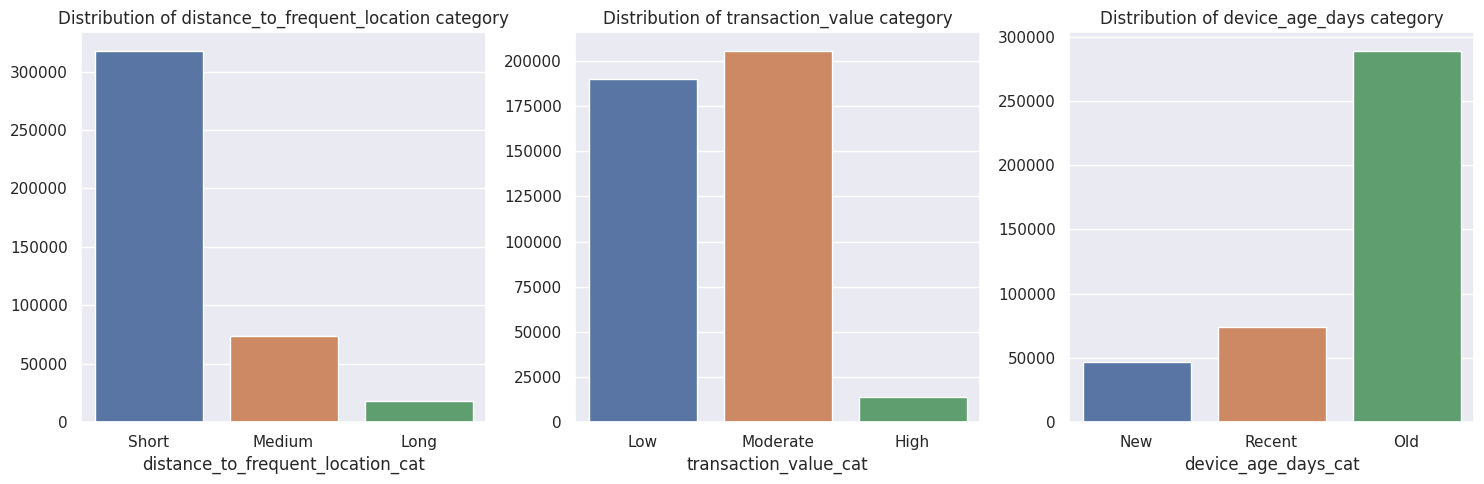

In [71]:
# Catplot: Distribution of the new categories
cut_fea = ['distance_to_frequent_location_cat','transaction_value_cat','device_age_days_cat']
f, ax = plt.subplots(figsize=(15, 5))

plt.subplot(1, 3, 1)
ax1 = sns.countplot(df, x="distance_to_frequent_location_cat")
ax1.set(title='Distribution of distance_to_frequent_location category')
ax1.set(ylabel=None)
plt.subplot(1, 3, 2)
ax1 = sns.countplot(df, x="transaction_value_cat")
ax1.set(title='Distribution of transaction_value category')
ax1.set(ylabel=None)
plt.subplot(1, 3, 3)
ax1 = sns.countplot(df, x="device_age_days_cat")
ax1.set(title='Distribution of device_age_days category')
ax1.set(ylabel=None)
plt.tight_layout()

## Data Interpretation

Drawing conclusions, making data-driven insights and formulating recommendations or decisions based on the analysis.

### Correlations considering the new features

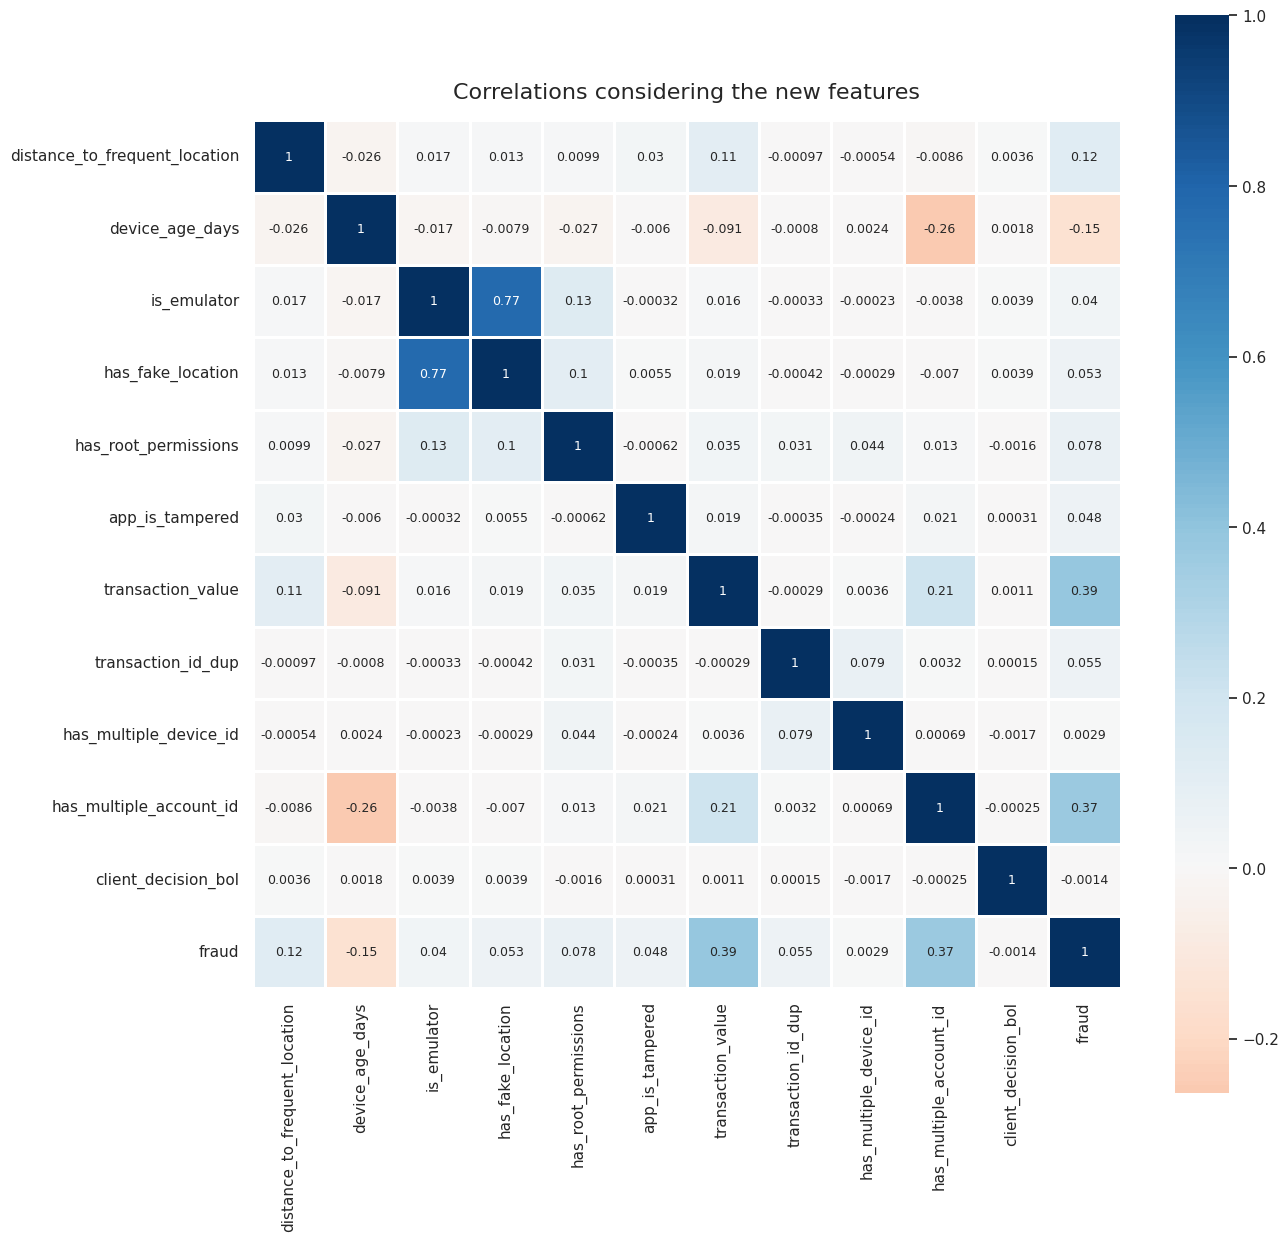

In [72]:
# Heatmap: Correlations considering the new features
new_cor = ['distance_to_frequent_location', 'device_age_days', 'is_emulator',
       'has_fake_location', 'has_root_permissions', 'app_is_tampered',
       'transaction_value', 'transaction_id_dup', 'has_multiple_device_id',
       'has_multiple_account_id','client_decision_bol', 'fraud']

coef = df[new_cor].corr()

sns.set_style('whitegrid')
plt.subplots(figsize=(14, 14))
sns.heatmap(
    coef,
    annot=True,
    annot_kws={"fontsize":9},
    cmap='RdBu',
    linewidths=.8,
    linecolor='white',
    center=0,
    square=True)
plt.title("Correlations considering the new features", fontsize=16, pad=16)
plt.show()

### Ranking of correlation coefficients in relation to the "Fraud" variable

In [73]:
# Table: Ranking of correlation coefficients in relation to the "Fraud" variable
sort = coef.abs().unstack().sort_values(kind="quicksort",ascending=False)
df_rank = pd.DataFrame(sort).reset_index()
df_rank = df_rank.rename(columns={"level_0": "Feature A", "level_1": "Feature",0 :"Coefficient"})
df_rank = df_rank[(df_rank['Feature A'] != df_rank['Feature']) & (df_rank['Feature A']=='fraud')].reset_index()
df_rank = df_rank.drop(["Feature A","index"], axis=1)
df_rank

Feature  Coefficient
0               transaction_value     0.389258
1         has_multiple_account_id     0.368247
2                 device_age_days     0.148678
3   distance_to_frequent_location     0.120114
4            has_root_permissions     0.078272
5              transaction_id_dup     0.055085
6               has_fake_location     0.053206
7                 app_is_tampered     0.048253
8                     is_emulator     0.040285
9          has_multiple_device_id     0.002894
10            client_decision_bol     0.001425

> According to the previous heatmap and the ranking table above, we can conclude that the **transaction value has the highest correlation** with the fraud event, and the 2-factor authentication process (`client_decision`) has the least impact.

> Another interesting observation is that the recently created variable "`has_multiple_account_id`" which indicates whether a device is using more than one account, is the second one that most correlates with the fraud event.

#### Graphical representation of the ranking of variables correlated with the Fraud variable

[Text(0, 0.5, '')]

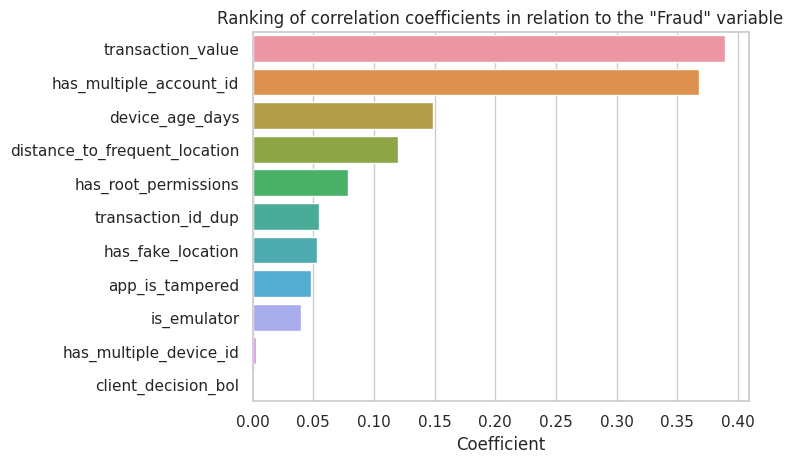

In [74]:
# Barplot: Ranking of correlation coefficients in relation to the "Fraud" variable
ax1 = sns.barplot(df_rank, y="Feature", x='Coefficient')
ax1.set(title='Ranking of correlation coefficients in relation to the "Fraud" variable')
ax1.set(ylabel=None)

# 2 - Fraud Risk Classification Rules

Creating fraud risk classification rules is an essential step in identifying and preventing fraudulent transactions within a digital bank's mobile app. These rules can help automate the process of flagging potentially risky transactions for further review. Here's a set of rules for classifying transactions into high, medium, and low risk of fraud based on the findings from the descriptive analysis.


##High-Risk Categories

1.	**High Transaction Value**
> Transactions with an unusually high monetary value are often at a higher risk of fraud, and __`transaction_value`__ is **highly overall correlated** with **fraud events**.
>- Threshold: Transactions with a value greater than 3 standard deviations from the mean transaction value were classified as high risk.
>- Rationale: Fraudsters may attempt to steal a significant amount in a single transaction. Unusually high transaction values should raise red flags.

2.	**Distance to Frequent Location (α>3)**
> If the distance of transactions to the frequent location is significantly greater than the average distance for that account, this is a geographic inconsistency that should be considered high risk. And here has found a **significant correlation** with **fraud events**.
>- Threshold: Transactions with a distance more than 3 standard deviations from the mean were classified as high risk.
>- Rationale: Fraudsters often initiate transactions from distant locations to avoid detection.

3.	**Is Emulator / Has Root Permissions**
> Transactions originating from devices identified as emulators or having root permissions should be classified as high risk.
>- Criteria: Transactions with TRUE value in these features were classified as high risk.
>- Rationale: Emulators and rooted devices are often used by fraudsters to manipulate the app and carry out fraudulent activities.

4.	**App is Tampered**
> Transactions originating from a tampered app are automatically classified as high risk.
>- Criteria: Transactions with TRUE value in this feature were classified as high risk.
>- Rationale: Tampered apps can be altered to hide fraudulent activity.

5.	**Has Fake Location**
> Transactions originating from devices with fake location information should be classified as high risk.
>- Criteria: Transactions with TRUE value in this feature were classified as high risk.
>- Rationale: The use of fake location data can indicate an attempt to conceal fraudulent activity.

6.	**Device Age Days**
> A new device used for the transaction should be classified as high risk.
>- Threshold: Devices that are zero days old were classified as high risk.
>- Rationale: New devices have not yet established a usage history, and this is an indicator that the device may have been reset.

7.	**Duplicated Transaction ID**
> This variable was created during this analysis and indicates that the same transaction id has been used more than once, which is clearly a sign of fraud.
>- Criteria: Transactions with TRUE value in this feature were classified as high risk.
>- Rationale: This feature is that legitimate transactions and should have unique ids, and repeated ids could mean that someone is trying to reuse a stolen or compromised transaction id.

8.	**Multiple Account ID**
> A variable `account_id_count` was created during this analysis and indicates the number of accounts the device has accessed. The same device being used to access more than 3 account could be a strong sign of fraud.
>- Threshold: Any device that has more than 3 account ids associated with it were classified as high risk.
>- Rationale: Legitimate users should have only one or a few account ids, and multiple account ids could mean that someone is using a device to access stolen or compromised accounts.

9.	**Missing Values**
> Missing values is defined as the data that is not stored (or not present) for some variables in the given dataset and can indicate that some transactions or accounts have incomplete or inaccurate information, which could be a sign of fraud.
>- Criteria: All variables counting missing values were flagged into new true/false variables and all transactions with TRUE values in these variables will be classified as high risk.
>- Rationale: Missing values can introduce bias and errors in the data analysis and the fraud detection models, depending on how they are treated or imputed. Therefore, missing values can compromise the validity and accuracy of the fraud risk assessment and the fraud prevention strategies.

## Medium-Risk Categories

1.	**Moderate Transaction Value**
> Transactions with a value greater than 1 standard deviation from the mean but not meeting the high-risk threshold can be classified as medium risk.
>- Threshold: Transactions with a value between 1 and 3 standard deviations from the mean transaction value were classified as medium risk.
>- Rationale: These transactions fall into a moderate risk category, indicating that they need closer examination.

2.	**Distance to Frequent Location (2<α<3)**
> If the distance of transactions to the frequent location is slightly greater than the average distance for that account, this is a geographic inconsistency that should be considered medium risk.
>- Threshold: Transactions with a distance between 2 and 3 standard deviations from the mean were classified as medium risk.
>- Rationale: Fraudsters often initiate transactions from distant locations to avoid detection.

3.	**Device Age Days (Up to 30 days)**
> A relatively new device used for the transactions  should be classified as medium risk.
>- Threshold: Devices aged between 1 and 30 days were classified as medium risk.
>- Rationale: Relatively new devices may not have established a usage history, making it harder to assess their risk.

4.	**Multiple Account ID (2 or 3)**
> A variable `account_id_count` was created during this analysis and indicates the number of accounts the device has accessed. The same device being used to access more than one account could be a sign of fraud.
>- Threshold: Any device with 2 or 3 accounts will be classified as medium risk.
>- Rationale: Legitimate users should have only one or a few account ids, and multiple account ids could mean that someone is using a device to access stolen or compromised accounts.

5.	**Multiple Device ID**
> A variable `has_multiple_device_id` was created during this analysis and indicates if same account being used to access more than one device.
>- Threshold: Any account with more than one device will be classified as medium risk.
>- Rationale: Legitimate users should access account with one device id, and multiple devices ids could mean that someone is using an account to access stolen or compromised devices.

6.	**Client Decision (2FA)**
> Transactions that have not passed 2FA can be classified as medium risk.
>- Criteria: Transactions with DENIED value in this feature were classified as medium risk.
>- Rationale: Denied 2FA fails to provide an additional layer of security, increasing the likelihood of fraud.

## Low-Risk Categories

1.	**Regular Device**
> Transactions from devices that have been associated with just 1 account can be classified as low risk.
>- Rationale: Established device-account relationships are less likely to be involved in fraudulent activities.

2.	**Regular Account**
> Transactions from accounts that have been associated with just 1 device can be classified as low risk.
>- Rationale: Established device-account relationships are less likely to be involved in fraudulent activities.

3.	**Normal Transaction Value**
> Transactions with values within 1 standard deviation from the mean can be classified as low risk.
>- Rationale: Normal transactions are those that do not exhibit any unusual monetary value.

4.	**Regular Location**
> Transactions that occur close to the frequent location associated with the device can be classified as low risk.
>- Rationale: Regular transactions from familiar locations are less likely to be fraudulent.

In addition, all transactions that have not been classified as high or medium risk will automatically be classified as low risk.

Summary of grouping Fraud Risk into categories:
- __High Risk__: Any feature with high-risk event found.
- __Medium Risk__: no features with high-risk events and at least 1 medium-risk event found.
- __Low Risk__: no features with high or medium risk events found.


## Creating risk levels variables

### Creating functions

In [75]:
# Defining functions that takes a value and returns the corresponding risk level
def fraud_risk1 (valor):
  if valor == 1:
    return 1
  else:
    return 0

def fraud_risk2 (valor):
  if valor == 0:
    return 1
  else:
    return 0

def account_id_count_high (valor):
  if valor > 3:
    return 1
  else:
    return 0

def account_id_count_medium (valor):
  if (valor==2) | (valor==3):
    return 1
  else:
    return 0

def zscore_high (valor):
  if valor > 3:
    return 1
  else:
    return 0

def age_high (valor):
  if valor == 0:
    return 1
  else:
    return 0

def zscore_medium (valor):
  if (valor > 2) & (valor <= 3):
    return 1
  else:
    return 0

def age_medium (valor):
  if (valor > 0) & (valor <= 30):
    return 1
  else:
    return 0


### Creating risk levels variables

In [76]:
# Creating risk levels variables
df['high_risk_lv'] = 0
df['medium_risk_lv'] = 0

In [77]:
# Defining the variables according to the level of risk identified in the analyses.
high_risk_fea = ['is_emulator',
                'has_fake_location',
                'has_root_permissions',
                'app_is_tampered',
                'na_is_emulator',
                'na_has_root_permissions',
                'na_app_is_tampered',
                'na_distance_to_frequent_location',
                'transaction_id_dup',
                'has_multiple_account_id',
                ]

risk_fea_z = ['transaction_value_z_score',
              'distance_to_frequent_location_z_score']

In [78]:
# High risk features
for fea in high_risk_fea:
  df['high_risk_lv'] = df['high_risk_lv'] + df[fea].apply(fraud_risk1)

df['high_risk_lv'] = df['high_risk_lv'] + df['account_id_count'].apply(account_id_count_high)
df['high_risk_lv'] = df['high_risk_lv'] + df['device_age_days'].apply(age_high)

for fea in risk_fea_z:
  df['high_risk_lv'] = df['high_risk_lv'] + df[fea].apply(zscore_high)

In [79]:
# Medium risk features
df['medium_risk_lv'] = df['medium_risk_lv'] + df['has_multiple_device_id'].apply(fraud_risk1)
df['medium_risk_lv'] = df['medium_risk_lv'] + df['client_decision_bol'].apply(fraud_risk2)
df['medium_risk_lv'] = df['medium_risk_lv'] + df['account_id_count'].apply(account_id_count_medium)
df['medium_risk_lv'] = df['medium_risk_lv'] + df['device_age_days'].apply(age_medium)

for fea in risk_fea_z:
  df['medium_risk_lv'] = df['medium_risk_lv'] + df[fea].apply(zscore_medium)

### Defining a function to categorize the transaction risk level

In [80]:
# Defining a function to categorize the transaction risk level
def categorize(a, b):
  if a > 0:
    return 'High'
  elif b > 0 and a == 0:
    return 'Medium'
  else:
    return 'Low'

# Applying the function to the columns and creating the new column risk_level
df['risk_level'] = df.apply(lambda row: categorize(row ['high_risk_lv'], row ['medium_risk_lv']), axis=1)
df['risk_level'].value_counts()

High      164435
Low       132183
Medium    112810
Name: risk_level, dtype: int64

### Representativeness of "risk_level" variable

Text(0.5, 1.0, 'Representativeness of risk_level category')

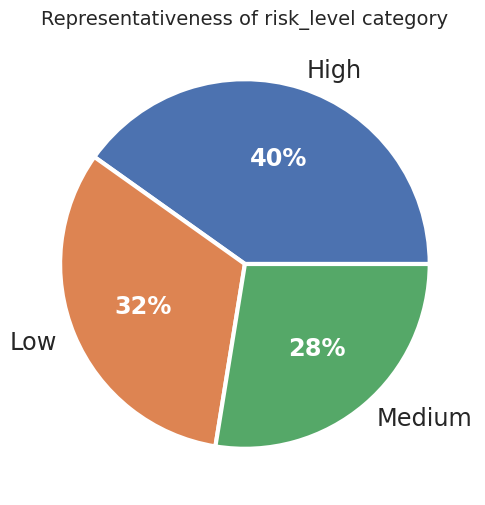

In [81]:
# Pie chart: Representativeness of "risk_level" variable
plt.figure(figsize=(6,6))
df_pie = df.groupby(['risk_level']).agg({'risk_level': ['count']})
df_pie.columns = ['count']
df_pie = df_pie.reset_index()
data = df_pie['count']
labels = df_pie["risk_level"]

patches, texts, pcts = plt.pie(data
    ,labels=labels
    ,autopct='%.0f%%'
    ,wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}
    ,counterclock=True
    ,textprops={'size': 'x-large'}
    )
plt.setp(pcts, color='white', fontweight='bold')
plt.title(f'Representativeness of risk_level category',fontsize=14)

### Risk Level per fraud response and fraud rate

In [82]:
# Table: risk_level per fraud response and fraud rate
df_gp = df.groupby(['risk_level', 'fraud']).agg({'fraud': ['count']})
df_gp.columns = ['count']
df_gp = df_gp.reset_index()
df_gp = df_gp.pivot_table('count', ['risk_level'], 'fraud')
df_gp = df_gp.rename(columns={0: 'No Fraud', 1: 'Fraud'})
df_gp['Total'] = df_gp['Fraud'] + df_gp['No Fraud']
df_gp['Risk Level Rate'] = df_gp['Fraud'] / df_gp['Total']
df_gp['Risk Level Rate'] = df_gp['Risk Level Rate'].transform(lambda x: '{:,.2%}'.format(x))
df_gp

fraud       No Fraud  Fraud   Total Risk Level Rate
risk_level                                         
High          127077  37358  164435          22.72%
Low           129527   2656  132183           2.01%
Medium        110283   2527  112810           2.24%

### Rate of fraud events that could be avoided

In [83]:
# Rate of fraud events that could be avoided
df_gp2 = df_gp.reset_index()
df_gp2.loc[df_gp2['risk_level']=='High','Fraud'].sum()

avoid_rate = df_gp2.loc[df_gp2['risk_level']=='High','Fraud'].sum() / df_gp2['Fraud'].sum()
print('Rate of fraud events that could be avoided using this model: ',format(avoid_rate, ".2%"))


Rate of fraud events that could be avoided using this model:  87.82%


### New Rate of fraud events using this model

In [84]:
# New Rate of fraud events using this model
old_rate = df_gp2.loc[:,'Fraud'].sum() / df_gp2.loc[:,'Total'].sum()
new_rate = df_gp2.loc[df_gp2['risk_level'].isin(['Low','Medium']),'Fraud'].sum() / df_gp2.loc[:,'Total'].sum()

print('Current Rate of fraud events : ',format(old_rate, ".2%"))
print('New Rate of fraud events using this model: ',format(new_rate, ".2%"))


Current Rate of fraud events :  10.39%
New Rate of fraud events using this model:  1.27%


# 3 - Evaluation of Classification Rules

## Current decision flow

- All transactions go through a 2FA process that costs R$O.05 per transaction
- The app eams 15% of the transaction value of all approved transactions
- The app loses 15% of the transaction value for all transactions that are approved and classified as fraud later (return the earned value)

In [85]:
# Decision flow parameters
df['2FA_cost'] = 0.05
df['2FA_earns'] = 0
df['2FA_losses'] = 0
df['balance'] = 0

cost = 0.05
earns = cost * 0.15
losses = -(earns)

df.loc[df['client_decision']=='approved','2FA_earns'] = earns
df.loc[(df['client_decision']=='approved') & (df['fraud']==1),'2FA_losses'] = losses
df.loc[:,'balance'] = df['2FA_cost'] + df['2FA_earns'] + df['2FA_losses']

In [86]:
df.loc[:,['client_decision','fraud','2FA_cost','2FA_earns','2FA_losses','balance']]

client_decision  fraud  2FA_cost  2FA_earns  2FA_losses  balance
0             approved    0.0      0.05     0.0075         0.0   0.0575
1             approved    0.0      0.05     0.0075         0.0   0.0575
2               denied    0.0      0.05     0.0000         0.0   0.0500
3             approved    0.0      0.05     0.0075         0.0   0.0575
4             approved    0.0      0.05     0.0075         0.0   0.0575
...                ...    ...       ...        ...         ...      ...
409423        approved    0.0      0.05     0.0075         0.0   0.0575
409424          denied    0.0      0.05     0.0000         0.0   0.0500
409425        approved    0.0      0.05     0.0075         0.0   0.0575
409426        approved    0.0      0.05     0.0075         0.0   0.0575
409427          denied    0.0      0.05     0.0000         0.0   0.0500

[409428 rows x 6 columns]

### Values referring to the current decision flow

In [97]:
# Printing the values referring to the current decision flow
FA_cost = df['2FA_cost'].sum().sum()
FA_earns = df['2FA_earns'].sum().sum()
FA_losses = df['2FA_losses'].sum().sum()
balance = df['balance'].sum().sum()

print('Total 2FA Cost: ','{:20,.2f}'.format(FA_cost))
print('Total Earns   : ','{:20,.2f}'.format(FA_earns))
print('Total Losses  : ','{:20,.2f}'.format(FA_losses))
print('Total Balance : ','{:20,.2f}'.format(balance))

Total 2FA Cost:             20,471.40
Total Earns   :              1,993.10
Total Losses  :               -206.45
Total Balance :             22,258.04


## New Decision Flow
> Considering that a new verification process will be implemented to act before 2FA process.

In [88]:
# New decision flow parameters
df['new_2FA_cost'] = 0.05
df['new_2FA_earns'] = 0
df['new_2FA_losses'] = 0
df['new_balance'] = 0

### 1.	**High-Risk Transactions**:

- Transactions classified as high risk based on the rules of **new verification process** will proceed with the standard 2FA fee of `R$ 0.05`.
- No transactions will be approved and 2FA will not be required.
-	The app should earn 10% of the transaction value for denied transactions.
- The app should not return any commission earned.



In [89]:
# High-Risk transactions parameters
cost = 0.5
earns = cost * 0.15
losses = 0
df.loc[df['risk_level']=='High','new_2FA_earns'] = earns
df.loc[(df['risk_level']=='High') & (df['fraud']==0),'new_2FA_losses'] = losses
df.loc[df['risk_level']=='High' ,'new_balance'] = df['new_2FA_cost'] + df['new_2FA_earns'] + df['new_2FA_losses']

### 2.	**Medium-Risk Transactions**:

- Transactions classified as medium risk based on the rules of **new verification process** will proceed with the standard 2FA fee of `R$ 0.05` per transaction.
- The new process will forward the transaction for 2FA decision.
-	The app should earn 10% of the transaction value for all approved transactions, as in the current setup.
-	If a medium-risk transaction is later found to be fraud, the app should return the commission earned.

In [90]:
# Medium-Risk transactions parameters
cost = 0.05
earns = cost * 0.10
losses = -(earns)
df.loc[(df['risk_level']=='Medium') & (df['client_decision']=='approved'),'new_2FA_earns'] = earns
df.loc[(df['risk_level']=='Medium') & (df['client_decision']=='approved') & (df['fraud']==1),'new_2FA_losses'] = losses
df.loc[df['risk_level']=='Medium' ,'new_balance'] = df['new_2FA_cost'] + df['new_2FA_earns'] + df['new_2FA_losses']

### 3.	**Low-Risk Transactions**:
-	Low-risk transactions can enjoy a streamlined and user-friendly experience.
-	The standard 2FA fee of `R$0.05` per transaction applies.
- The new process continues to forward the transaction for 2FA decision.
-	The app earns 10% of the transaction value for all approved transactions, as in the current setup.
-	If any initially approved low-risk transaction is later confirmed as fraud, the app should return the entire transaction value and commission.

In [91]:
# Low-Risk transactions parameters
cost = 0.05
earns = cost * 0.10
losses = -(cost + earns)
df.loc[(df['risk_level']=='Low') & (df['client_decision']=='approved'),'new_2FA_earns'] = earns
df.loc[(df['risk_level']=='Low') & (df['client_decision']=='approved') & (df['fraud']==1),'new_2FA_loses'] = losses
df.loc[df['risk_level']=='Low' ,'new_balance'] = df['new_2FA_cost'] + df['new_2FA_earns'] + df['new_2FA_losses']

In [92]:
# Checking results
df.loc[:,['client_decision','fraud','risk_level','new_2FA_cost','new_2FA_earns','new_2FA_losses','new_balance']]

client_decision  fraud risk_level  new_2FA_cost  new_2FA_earns  \
0             approved    0.0        Low          0.05          0.005   
1             approved    0.0        Low          0.05          0.005   
2               denied    0.0     Medium          0.05          0.000   
3             approved    0.0     Medium          0.05          0.005   
4             approved    0.0       High          0.05          0.075   
...                ...    ...        ...           ...            ...   
409423        approved    0.0        Low          0.05          0.005   
409424          denied    0.0     Medium          0.05          0.000   
409425        approved    0.0     Medium          0.05          0.005   
409426        approved    0.0        Low          0.05          0.005   
409427          denied    0.0       High          0.05          0.075   

        new_2FA_losses  new_balance  
0                  0.0        0.055  
1                  0.0        0.055  
2                  0.0        0.050  
3                  0.0        0.055  
4                  0.0        0.125  
...                ...          ...  
409423             0.0        0.055  
409424             0.0        0.050  
409425             0.0        0.055  
409426             0.0        0.055  
409427             0.0        0.125  

[409428 rows x 7 columns]

### Values referring to the new decision flow

In [98]:
# Printing the values referring to the new decision flow
new_FA_cost = df['new_2FA_cost'].sum().sum()
new_FA_earns = df['new_2FA_earns'].sum().sum()
new_FA_losses = df['new_2FA_losses'].sum().sum()
new_balance = df['new_balance'].sum().sum()

print('Total 2FA Cost: ','{:20,.2f}'.format(new_FA_cost))
print('Total Earns   : ','{:20,.2f}'.format(new_FA_earns))
print('Total Losses  : ','{:20,.2f}'.format(new_FA_losses))
print('Total Balance : ','{:20,.2f}'.format(new_balance))

Total 2FA Cost:             20,471.40
Total Earns   :             13,127.48
Total Losses  :                 -3.29
Total Balance :             33,595.60


### Comparing the balances of the current decision flow with the new one implemented

In [94]:
df_comp = pd.DataFrame({'Measure':['Total 2FA Cost','Total Earns','Total Loses','Total Balance'],
                        'Current Flow':[FA_cost,FA_earns,FA_losses,balance],
                        'New Flow':[new_FA_cost,new_FA_earns,new_FA_losses,new_balance]})

df_comp['Difference'] = df_comp['New Flow'] - df_comp['Current Flow']

def format_currency(valor):
  return '{:20,.2f}'.format(valor)

df_comp['Current Flow'] = df_comp['Current Flow'].apply(format_currency)
df_comp['New Flow'] = df_comp['New Flow'].apply(format_currency)
df_comp['Difference'] = df_comp['Difference'].apply(format_currency)
df_comp


Measure          Current Flow              New Flow  \
0  Total 2FA Cost             20,471.40             20,471.40   
1     Total Earns              1,993.10             13,127.48   
2     Total Loses               -206.45                 -3.29   
3   Total Balance             22,258.04             33,595.60   

             Difference  
0                  0.00  
1             11,134.39  
2                203.17  
3             11,337.56

> Summary
- **Cost of the new verification process**: remained the same
- **Losses**: almost eliminated
- **Earns**: grew significantly
- **Balance**: increased

### Calculating growth rate

In [95]:
# Calculating growth rate between balances
difference = new_balance - balance
diff_rate = difference / balance
print('Growth rate was:','{:20,.2%}'.format(diff_rate))

Growth rate was:               50.94%


## Impact on User Experience

-	The new decision flow reduces the risk of false positives for high-risk transactions by charging a higher commission. This aligns with the conservative approach to minimize fraud in high-risk cases.
-	False negatives (missed fraudulent transactions) may decrease with the enhanced classification of high-risk transactions.
-	Medium and low-risk transactions maintain a balance between approval and security, minimizing false positives.


> In summary, this proposed decision flow aligns the cost and risk assessments, charging higher commission for high-risk transactions and protecting the app's earnings in the event of fraud. The impact on user experience is largely positive, with increased security for high-risk transactions and minimal disruption to medium and low-risk transactions.

# 4 - Recommendations and Conclusion

## Recommendations

Here are 3 basic recommendations for optimizing the fraud detection and minimizing the impact on user experience and maximizing financial gains. The first is what we try to accomplish with this work.

1. First, using a risk-based approach to prioritize and manage fraud detection activities. A risk-based approach means that different transactions or accounts are assigned different levels of risk based on their characteristics, behavior, and history. The risk level determines the degree of scrutiny and intervention that is applied to each transaction or account. For example, high-risk transactions or accounts may be subject to more frequent monitoring, stricter rules, or manual review, while low-risk transactions or accounts may be processed with less friction or delay. A risk-based approach can help to allocate resources more efficiently and effectively, as well as reduce the impact on user experience for low-risk users.

2. Secondly, optimizing the trade-off between false positives and false negatives in fraud detection. False positives are transactions that are wrongly classified as fraud, while false negatives are transactions that are wrongly classified as non-fraud. Both types of errors can have negative impacts on user experience and financial gains. False positives can annoy or frustrate legitimate users who are denied access to the payment system or have to go through additional verification steps. False negatives can result in financial losses due to undetected fraud. Therefore, it is important to find the optimal balance between false positives and false negatives that minimizes the expected financial losses and maximizes the customer satisfaction.

3. And finally, using machine learning techniques to build fraud detection models that can learn from historical data and adapt to new patterns of fraud. Machine learning models can achieve higher accuracy and efficiency than rule-based or static methods, as they can capture complex and nonlinear relationships between features and fraud labels. However, machine learning models also require careful selection, evaluation, and tuning of algorithms, parameters, and features to avoid overfitting, underfitting, or bias.



### Summarizing the findings.
> To summarize, __88% of fraud event could be avoided using this model__. In addition, besides the model gets the positive class right, it still needs to improve to reduce false positives, and the impact of this is directly related to friction with the customer, if the classification is adopted by the bank. On the other hand, the result is very positive in reducing fraud, where the current rate is 10% and would **fall to 1.27% following this model**.

> Furthermore, when we compare the balances between the current and the new decision flow, the **cost of the verification process remained the same**, losses decreased and **gains grew significantly**, which resulted in a **higher final balance** in the new decision flow, and a more efficient process for detecting fraud.

# Saving the dataset

In [96]:
df.to_csv('output_dataset.csv',index=False)

# End of Report